# Station QU39 analysis

An analysis of the environmental drivers of spring bloom timing at Station QU39. This notebook works only for variables stored in pickle files created by the notebook ``makePickles201905.ipynb``, which can be found at ``/ocean/aisabell/MEOPAR/Analysis-Aline/notebooks/notebooks/Bloom_Timing/stationQU39/makePickles201905_QU39.ipynb``

To recreate this notebook, first create the pickle files, then follow the instructions in the second code cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations, bloomdrivers
import xarray as xr
import pandas as pd
import pickle
import os
import seaborn as sns
import cmocean
import pylab


%matplotlib inline

### To recreate this notebook at a different location
follow these instructions: 

In [2]:
# The path to the directory where the pickle files are stored:
savedir='/ocean/aisabell/MEOPAR/extracted_files'
# Change 'S3' to the location of interest
loc='QU39'
# What is the start year and end year+1 of the time range of interest?
startyear=2007
endyear=2021 # does NOT include this value

# Note: x and y limits on the location map may need to be changed 
# Note: xticks in the plots will need to be changed
# Note: 201812 bloom timing variable load and plotting will also need to be removed

1.1363636363636362

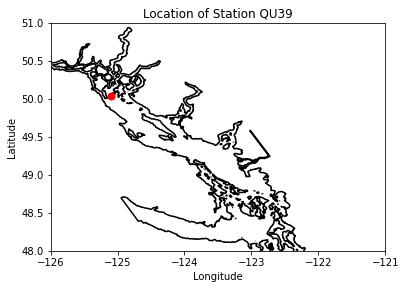

In [3]:
modver='201905'
# lat and lon information for place:
lon,lat=places.PLACES[loc]['lon lat']
# get place information on SalishSeaCast grid:
ij,ii=places.PLACES[loc]['NEMO grid ji']
jw,iw=places.PLACES[loc]['GEM2.5 grid ji']

fig, ax = plt.subplots(1,1,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as mesh:
    ax.contour(mesh.nav_lon,mesh.nav_lat,mesh.tmask.isel(t=0,z=0),[0.1,],colors='k')
    tmask=np.array(mesh.tmask)
    gdept_1d=np.array(mesh.gdept_1d)
    e3t_0=np.array(mesh.e3t_0)
ax.plot(lon, lat, '.', markersize=14, color='red')
ax.set_ylim(48,51)
ax.set_xlim(-126,-121)
ax.set_title('Location of Station %s'%loc)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
viz_tools.set_aspect(ax,coords='map')

### Strait of Georgia Region

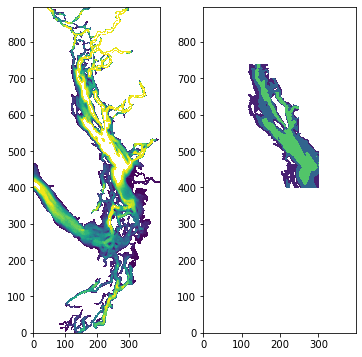

In [4]:
# define sog region:
fig, ax = plt.subplots(1,2,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    bath=np.array(bathy.Bathymetry)
ax[0].contourf(bath,np.arange(0,250,10))
viz_tools.set_aspect(ax[0],coords='grid')
sogmask=np.copy(tmask[:,:,:,:])
sogmask[:,:,740:,:]=0
sogmask[:,:,700:,170:]=0
sogmask[:,:,550:,250:]=0
sogmask[:,:,:,302:]=0
sogmask[:,:,:400,:]=0
sogmask[:,:,:,:100]=0
#sogmask250[bath<250]=0
ax[1].contourf(np.ma.masked_where(sogmask[0,0,:,:]==0,bathy.Bathymetry),[0,100,250,550])

** **Stop and check, have you made pickle files for all the years?** **

In [5]:
# loop through years of spring time series (mid feb-june) for bloom timing for 201905 run
years=list()
bloomtime1=list()
bloomtime2=list()
bloomtime3=list()
for year in range(startyear,endyear):
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    # put code that calculates bloom timing here
    bt1=bloomdrivers.metric1_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt2=bloomdrivers.metric2_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt3=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    years.append(year)
    bloomtime1.append(bt1)
    bloomtime2.append(bt2)
    bloomtime3.append(bt3)   
years=np.array(years)
bloomtime1=np.array(bloomtime1)
bloomtime2=np.array(bloomtime2)
bloomtime3=np.array(bloomtime3)

# get year day
yearday1=et.datetimeToYD(bloomtime1)  # convert to year day tool
yearday2=et.datetimeToYD(bloomtime2)
yearday3=et.datetimeToYD(bloomtime3)

**Combine separate year files into arrays:**

In [6]:
# loop through years (for location specific drivers)

years=list()
windjan=list()
windfeb=list()
windmar=list()
solarjan=list()
solarfeb=list()
solarmar=list()
parjan=list()
parfeb=list()
parmar=list()
tempjan=list()
tempfeb=list()
tempmar=list()
saljan=list()
salfeb=list()
salmar=list()
zoojan=list()
zoofeb=list()
zoomar=list()
mesozoojan=list()
mesozoofeb=list()
mesozoomar=list()
microzoojan=list()
microzoofeb=list()
microzoomar=list()
intzoojan=list()
intzoofeb=list()
intzoomar=list()
intmesozoojan=list()
intmesozoofeb=list()
intmesozoomar=list()
intmicrozoojan=list()
intmicrozoofeb=list()
intmicrozoomar=list()
midno3jan=list()
midno3feb=list()
midno3mar=list()

for year in range(startyear,endyear):
    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    # put code that calculates drivers here
    wind=bloomdrivers.D1_3monthly_avg(twind,wspeed)
    solar=bloomdrivers.D1_3monthly_avg(twind,solar)
    par=bloomdrivers.D1_3monthly_avg(bio_time,spar)
    temp=bloomdrivers.D1_3monthly_avg(grid_time,temp)
    sal=bloomdrivers.D1_3monthly_avg(grid_time,salinity)
    zoo=bloomdrivers.D2_3monthly_avg(bio_time,zoop_alld)
    mesozoo=bloomdrivers.D2_3monthly_avg(bio_time,mesozoo_alld)
    microzoo=bloomdrivers.D2_3monthly_avg(bio_time,microzoo_alld)
    intzoo=bloomdrivers.D1_3monthly_avg(bio_time,intzoop)
    intmesozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmesoz)
    intmicrozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmicroz)
    midno3=bloomdrivers.D1_3monthly_avg(bio_time,no3_30to90m)
    
    years.append(year)
    windjan.append(wind[0])
    windfeb.append(wind[1])
    windmar.append(wind[2])   
    solarjan.append(solar[0])
    solarfeb.append(solar[1])
    solarmar.append(solar[2])
    parjan.append(par[0])
    parfeb.append(par[1])
    parmar.append(par[2])
    tempjan.append(temp[0])
    tempfeb.append(temp[1])
    tempmar.append(temp[2])
    saljan.append(sal[0])
    salfeb.append(sal[1])
    salmar.append(sal[2])
    zoojan.append(zoo[0])
    zoofeb.append(zoo[1])
    zoomar.append(zoo[2])
    mesozoojan.append(mesozoo[0])
    mesozoofeb.append(mesozoo[1])
    mesozoomar.append(mesozoo[2])
    microzoojan.append(microzoo[0])
    microzoofeb.append(microzoo[1])
    microzoomar.append(microzoo[2])
    intzoojan.append(intzoo[0])
    intzoofeb.append(intzoo[1])
    intzoomar.append(intzoo[2])
    intmesozoojan.append(intmesozoo[0])
    intmesozoofeb.append(intmesozoo[1])
    intmesozoomar.append(intmesozoo[2])
    intmicrozoojan.append(intmicrozoo[0])
    intmicrozoofeb.append(intmicrozoo[1])
    intmicrozoomar.append(intmicrozoo[2])
    midno3jan.append(midno3[0])
    midno3feb.append(midno3[1])
    midno3mar.append(midno3[2])

years=np.array(years)
windjan=np.array(windjan)
windfeb=np.array(windfeb)
windmar=np.array(windmar)
solarjan=np.array(solarjan)
solarfeb=np.array(solarfeb)
solarmar=np.array(solarmar)
parjan=np.array(parjan)
parfeb=np.array(parfeb)
parmar=np.array(parmar)
tempjan=np.array(tempjan)
tempfeb=np.array(tempfeb)
tempmar=np.array(tempmar)
saljan=np.array(saljan)
salfeb=np.array(salfeb)
salmar=np.array(salmar)
zoojan=np.array(zoojan)
zoofeb=np.array(zoofeb)
zoomar=np.array(zoomar)
mesozoojan=np.array(mesozoojan)
mesozoofeb=np.array(mesozoofeb)
mesozoomar=np.array(mesozoomar)
microzoojan=np.array(microzoojan)
microzoofeb=np.array(microzoofeb)
microzoomar=np.array(microzoomar)
intzoojan=np.array(intzoojan)
intzoofeb=np.array(intzoofeb)
intzoomar=np.array(intzoomar)
intmesozoojan=np.array(intmesozoojan)
intmesozoofeb=np.array(intmesozoofeb)
intmesozoomar=np.array(intmesozoomar)
intmicrozoojan=np.array(intmicrozoojan)
intmicrozoofeb=np.array(intmicrozoofeb)
intmicrozoomar=np.array(intmicrozoomar)
midno3jan=np.array(midno3jan)
midno3feb=np.array(midno3feb)
midno3mar=np.array(midno3mar)

In [7]:
# loop through years (for non-location specific drivers)
fraserjan=list()
fraserfeb=list()
frasermar=list()
deepno3jan=list()
deepno3feb=list()
deepno3mar=list()

for year in range(startyear,endyear):
    fname2=f'JanToMarch_TimeSeries_{year}_{modver}.pkl'
    savepath2=os.path.join(savedir,fname2)
    no3_past250m,riv_time,rivFlow=pickle.load(open(savepath2,'rb'))
    # Code that calculates drivers here
    fraser=bloomdrivers.D1_3monthly_avg2(riv_time,rivFlow)
    fraserjan.append(fraser[0])
    fraserfeb.append(fraser[1])
    frasermar.append(fraser[2])

    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    deepno3=bloomdrivers.D1_3monthly_avg(bio_time,no3_past250m)
 
    deepno3jan.append(deepno3[0])
    deepno3feb.append(deepno3[1])
    deepno3mar.append(deepno3[2])

fraserjan=np.array(fraserjan)
fraserfeb=np.array(fraserfeb)
frasermar=np.array(frasermar)
deepno3jan=np.array(deepno3jan)
deepno3feb=np.array(deepno3feb)
deepno3mar=np.array(deepno3mar)

**Load mixing variables**

In [8]:
# for T grid depth:
startd=dt.datetime(2015,1,1) # some date to get depth
endd=dt.datetime(2015,1,2)
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
tres=24 # 1: hourly resolution; 24: daily resolution
flist=et.index_model_files(startd,endd,basedir,nam_fmt,flen,"grid_T",tres)
with xr.open_mfdataset(flist['paths']) as gridt:
    depth_T=np.array(gridt.deptht)

# loop through years (for mixing drivers)

halojan=list()
halofeb=list()
halomar=list()
turbojan=list()
turbofeb=list()
turbomar=list()
densdiff5jan=list()
densdiff10jan=list()
densdiff15jan=list()
densdiff20jan=list()
densdiff25jan=list()
densdiff30jan=list()
densdiff5feb=list()
densdiff10feb=list()
densdiff15feb=list()
densdiff20feb=list()
densdiff25feb=list()
densdiff30feb=list()
densdiff5mar=list()
densdiff10mar=list()
densdiff15mar=list()
densdiff20mar=list()
densdiff25mar=list()
densdiff30mar=list()
eddy15jan=list()
eddy15feb=list()
eddy15mar=list()
eddy30jan=list()
eddy30feb=list()
eddy30mar=list()

for year in range(startyear,endyear):
    fname4=f'JanToMarch_Mixing_{year}_{loc}_{modver}.pkl'
    savepath4=os.path.join(savedir,fname4)
    halocline,eddy,depth,grid_time,temp,salinity=pickle.load(open(savepath4,'rb'))
   
    # halocline
    halo=bloomdrivers.D1_3monthly_avg(grid_time,halocline)
    halojan.append(halo[0])
    halofeb.append(halo[1])
    halomar.append(halo[2])
    # turbocline
    turbo=bloomdrivers.turbo(eddy,grid_time,depth_T)
    turbojan.append(turbo[0])
    turbofeb.append(turbo[1])
    turbomar.append(turbo[2])
    # density differences
    dict_diffs=bloomdrivers.density_diff(salinity,temp,grid_time)
    values=dict_diffs.values()
    all_diffs=list(values)
    densdiff5jan.append(all_diffs[0])
    densdiff10jan.append(all_diffs[3])
    densdiff15jan.append(all_diffs[6])
    densdiff20jan.append(all_diffs[9])
    densdiff25jan.append(all_diffs[12])
    densdiff30jan.append(all_diffs[15])
    densdiff5feb.append(all_diffs[1])
    densdiff10feb.append(all_diffs[4])
    densdiff15feb.append(all_diffs[7])
    densdiff20feb.append(all_diffs[10])
    densdiff25feb.append(all_diffs[13])
    densdiff30feb.append(all_diffs[16])
    densdiff5mar.append(all_diffs[2])
    densdiff10mar.append(all_diffs[5])
    densdiff15mar.append(all_diffs[8])
    densdiff20mar.append(all_diffs[11])
    densdiff25mar.append(all_diffs[14])
    densdiff30mar.append(all_diffs[17])
    # average eddy diffusivity 
    avg_eddy=bloomdrivers.avg_eddy(eddy,grid_time,ij,ii)
    eddy15jan.append(avg_eddy[0])
    eddy15feb.append(avg_eddy[1])
    eddy15mar.append(avg_eddy[2])
    eddy30jan.append(avg_eddy[3])
    eddy30feb.append(avg_eddy[4])
    eddy30mar.append(avg_eddy[5])

halojan=np.array(halojan)
halofeb=np.array(halofeb)
halomar=np.array(halomar)
turbojan=np.array(turbojan)
turbofeb=np.array(turbofeb)
turbomar=np.array(turbomar)
densdiff5jan=np.array(densdiff5jan)
densdiff10jan=np.array(densdiff10jan)
densdiff15jan=np.array(densdiff15jan)
densdiff20jan=np.array(densdiff20jan)
densdiff25jan=np.array(densdiff25jan)
densdiff30jan=np.array(densdiff30jan)
densdiff5feb=np.array(densdiff5feb)
densdiff10feb=np.array(densdiff10feb)
densdiff15feb=np.array(densdiff15feb)
densdiff20feb=np.array(densdiff20feb)
densdiff25feb=np.array(densdiff25feb)
densdiff30feb=np.array(densdiff30feb)
densdiff5mar=np.array(densdiff5mar)
densdiff10mar=np.array(densdiff10mar)
densdiff15mar=np.array(densdiff15mar)
densdiff20mar=np.array(densdiff20mar)
densdiff25mar=np.array(densdiff25mar)
densdiff30mar=np.array(densdiff30mar)
eddy15jan=np.array(eddy15jan)
eddy15feb=np.array(eddy15feb)
eddy15mar=np.array(eddy15mar)
eddy30jan=np.array(eddy30jan)
eddy30feb=np.array(eddy30feb)
eddy30mar=np.array(eddy30mar)

In [9]:
# January dataframe
dfjan=pd.DataFrame({'metric1':yearday1, 'metric2':yearday2, 'metric3':yearday3, 'wind':windjan,'solar':solarjan,
                  'temp':tempjan,'sal':saljan,'midno3':midno3jan,'fraser':fraserjan,'deepno3':deepno3jan,'halocline':halojan,
                   'turbocline':turbojan,'eddy15jan':eddy15jan,'eddy30jan':eddy30jan,'densdiff5jan':densdiff5jan,'densdiff10jan':densdiff10jan,
                    'densdiff15jan':densdiff15jan,'densdiff20jan':densdiff20jan,'densdiff25jan':densdiff25jan,'densdiff30jan':densdiff30jan})
# February dataframe
dffeb=pd.DataFrame({'metric1':yearday1, 'metric2':yearday2, 'metric3':yearday3, 'wind':windfeb,'solar':solarfeb,
                  'temp':tempfeb,'sal':salfeb,'midno3':midno3feb,'fraser':fraserfeb,'deepno3':deepno3feb,'halocline':halofeb,
                   'turbocline':turbofeb,'eddy15feb':eddy15feb,'eddy30feb':eddy30feb,'densdiff5feb':densdiff5feb,'densdiff10feb':densdiff10feb,
                    'densdiff15feb':densdiff15feb,'densdiff20feb':densdiff20feb,'densdiff25feb':densdiff25feb,'densdiff30feb':densdiff30feb})
# March dataframe
dfmar=pd.DataFrame({'metric1':yearday1, 'metric2':yearday2, 'metric3':yearday3, 'wind':windmar,'solar':solarmar,
                  'temp':tempmar,'sal':salmar,'midno3':midno3mar,'fraser':frasermar,'deepno3':deepno3mar,'halocline':halomar,
                   'turbocline':turbomar,'eddy15mar':eddy15mar,'eddy30mar':eddy30mar,'densdiff5mar':densdiff5mar,'densdiff10mar':densdiff10mar,
                    'densdiff15mar':densdiff15mar,'densdiff20mar':densdiff20mar,'densdiff25mar':densdiff25mar,'densdiff30mar':densdiff30mar})

In [10]:
dfjan.cov()

,metric1,metric2,metric3,wind,solar,temp,sal,midno3,fraser,deepno3,halocline,turbocline,eddy15jan,eddy30jan,densdiff5jan,densdiff10jan,densdiff15jan,densdiff20jan,densdiff25jan,densdiff30jan
metric1,198.708791,58.818681,86.543956,-1.781007,-24.551781,-1.899305,-4.171853,3.182167,460.748634,7.319341,-14.028757,-10.208520,-0.005371,0.000546,1.489626,1.996308,2.079153,2.035085,2.015683,2.006130
metric2,58.818681,183.609890,114.093407,-3.759146,-0.392339,-5.556492,-1.366552,5.909751,-735.152037,9.249013,9.568067,-21.019686,-0.039168,-0.020004,1.609624,1.804854,1.437595,1.063485,0.914941,0.760366
metric3,86.543956,114.093407,120.796703,-2.198781,-3.433917,-2.763616,-2.456685,2.671314,251.183023,5.807583,-7.939469,-18.687149,-0.033942,-0.024496,1.129664,1.243871,1.056110,0.885142,0.829251,0.791165
wind,-1.781007,-3.759146,-2.198781,3.134961,-2.107447,0.981135,0.901448,-0.974413,88.585947,-0.612914,20.890352,14.974924,0.039996,0.029182,-0.580268,-0.796133,-0.855116,-0.865071,-0.862337,-0.850927
solar,-24.551781,-0.392339,-3.433917,-2.107447,45.519190,-1.330414,-0.558300,-0.899332,51.996331,-1.589763,-14.993866,-14.146827,-0.024421,-0.017253,0.088360,0.157401,0.272019,0.356692,0.385514,0.413930
temp,-1.899305,-5.556492,-2.763616,0.981135,-1.330414,0.610327,0.350412,-0.490322,62.318564,-0.453589,5.746611,4.698350,0.011770,0.008494,-0.252032,-0.329667,-0.340281,-0.331984,-0.326174,-0.317574
sal,-4.171853,-1.366552,-2.456685,0.901448,-0.558300,0.350412,0.391185,-0.325314,-0.749033,-0.277982,6.609216,4.504982,0.011022,0.008235,-0.211624,-0.286016,-0.308297,-0.313362,-0.313584,-0.312134
midno3,3.182167,5.909751,2.671314,-0.974413,-0.899332,-0.490322,-0.325314,0.722836,-65.951011,0.616738,-5.451585,-4.602925,-0.011950,-0.008816,0.252452,0.343353,0.354370,0.345060,0.338895,0.330073
fraser,460.748634,-735.152037,251.183023,88.585947,51.996331,62.318564,-0.749033,-65.951011,25704.091440,-43.359271,479.546075,355.694741,1.153008,0.777520,-19.199387,-26.115336,-24.970412,-22.344248,-20.872513,-18.740164
deepno3,7.319341,9.249013,5.807583,-0.612914,-1.589763,-0.453589,-0.277982,0.616738,-43.359271,0.880773,-1.311233,-2.700664,-0.006737,-0.004386,0.193277,0.236574,0.225218,0.204758,0.195887,0.185586


In [11]:
dffeb.cov()

,metric1,metric2,metric3,wind,solar,temp,sal,midno3,fraser,deepno3,halocline,turbocline,eddy15feb,eddy30feb,densdiff5feb,densdiff10feb,densdiff15feb,densdiff20feb,densdiff25feb,densdiff30feb
metric1,198.708791,58.818681,86.543956,-1.849740,-41.773812,2.342734,-3.239866,3.572518,1649.803298,7.411141,1.585195,-5.660840,0.011697,0.014511,1.246483,1.685212,1.658779,1.660655,1.679456,1.699027
metric2,58.818681,183.609890,114.093407,-6.291101,-74.793705,-4.900849,-1.419273,6.055971,-1962.276543,9.132885,-26.980415,-16.081202,-0.033107,-0.018400,1.777272,1.955536,1.644143,1.339660,1.222098,1.071362
metric3,86.543956,114.093407,120.796703,-4.642330,-40.508822,-0.828064,-2.734266,2.779492,738.413509,5.820826,-9.073753,-11.118173,-0.032819,-0.021803,1.556998,1.838885,1.648449,1.489859,1.447763,1.403427
wind,-1.849740,-6.291101,-4.642330,1.401925,2.911385,0.381466,0.398035,-0.593709,89.382727,-0.644834,5.615016,5.308898,0.014548,0.010689,-0.343006,-0.423413,-0.410310,-0.389914,-0.381788,-0.369598
solar,-41.773812,-74.793705,-40.508822,2.911385,99.145234,-0.482920,0.559377,-5.327000,1168.686718,-5.520401,8.598186,3.159787,-0.000003,-0.008327,-1.232965,-1.313714,-1.139214,-0.987906,-0.939278,-0.879533
temp,2.342734,-4.900849,-0.828064,0.381466,-0.482920,0.478955,-0.013275,-0.215094,167.352499,-0.220183,2.486131,1.668419,0.004312,0.003354,-0.060687,-0.071531,-0.063301,-0.050422,-0.044022,-0.035415
sal,-3.239866,-1.419273,-2.734266,0.398035,0.559377,-0.013275,0.212630,-0.123869,-42.880221,-0.179813,1.243835,1.497781,0.003892,0.002761,-0.124445,-0.161186,-0.161406,-0.158466,-0.157484,-0.155511
midno3,3.572518,6.055971,2.779492,-0.593709,-5.327000,-0.215094,-0.123869,0.617537,-140.013352,0.622136,-2.584556,-1.957714,-0.003794,-0.002469,0.192130,0.221361,0.205215,0.187614,0.180807,0.171595
fraser,1649.803298,-1962.276543,738.413509,89.382727,1168.686718,167.352499,-42.880221,-140.013352,122323.912955,-76.481005,1063.033169,363.471527,0.436726,0.213553,-23.407139,-25.651198,-22.482233,-16.675317,-13.482208,-9.090725
deepno3,7.411141,9.132885,5.820826,-0.644834,-5.520401,-0.220183,-0.179813,0.622136,-76.481005,0.869508,-2.063388,-2.141814,-0.004073,-0.002606,0.189213,0.213784,0.192431,0.173443,0.166751,0.157513


In [12]:
dfmar.cov()

,metric1,metric2,metric3,wind,solar,temp,sal,midno3,fraser,deepno3,halocline,turbocline,eddy15mar,eddy30mar,densdiff5mar,densdiff10mar,densdiff15mar,densdiff20mar,densdiff25mar,densdiff30mar
metric1,198.708791,58.818681,86.543956,4.365834,-185.218296,0.013832,-0.290914,2.136903,2017.992998,7.361070,71.198823,28.176383,0.076010,0.063054,0.171061,-0.007819,-0.353067,-0.600573,-0.687358,-0.799498
metric2,58.818681,183.609890,114.093407,1.813381,-230.751058,-4.922801,1.633999,5.690149,-2441.123281,9.106444,85.613449,15.828831,0.035473,0.035777,-0.098475,-0.826942,-1.364141,-1.778049,-1.919407,-2.071328
metric3,86.543956,114.093407,120.796703,3.582495,-219.604300,-1.512966,0.389586,1.891126,974.083020,5.845356,56.099428,20.100823,0.032414,0.024222,-0.097452,-0.640954,-1.044427,-1.350948,-1.447003,-1.550702
wind,4.365834,1.813381,3.582495,1.909641,-3.958546,0.146660,-0.047482,-0.399715,199.635382,-0.193218,11.378855,7.881106,0.023026,0.017404,-0.115616,-0.169596,-0.179415,-0.176016,-0.175132,-0.172940
solar,-185.218296,-230.751058,-219.604300,-3.958546,567.752940,2.264234,0.585741,-6.847961,-2302.959134,-14.228274,-80.249982,-16.833473,0.014422,0.010670,-0.402422,0.235974,0.836020,1.353030,1.531724,1.718901
temp,0.013832,-4.922801,-1.512966,0.146660,2.264234,0.322232,-0.091337,-0.235775,195.312586,-0.269115,-1.211991,0.395921,0.000252,-0.000233,-0.013770,-0.005412,0.008096,0.020885,0.025942,0.032643
sal,-0.290914,1.633999,0.389586,-0.047482,0.585741,-0.091337,0.103570,0.122926,-83.681615,0.089582,0.219489,-0.146622,-0.000197,-0.000021,-0.016322,-0.031384,-0.038395,-0.041411,-0.042855,-0.045078
midno3,2.136903,5.690149,1.891126,-0.399715,-6.847961,-0.235775,0.122926,0.591168,-156.927386,0.556078,0.008021,-1.895241,-0.004031,-0.002466,0.037026,0.032726,0.014730,-0.000229,-0.006657,-0.015007
fraser,2017.992998,-2441.123281,974.083020,199.635382,-2302.959134,195.312586,-83.681615,-156.927386,234451.617848,-54.719142,78.887639,635.049576,1.109607,0.493009,-3.675397,0.573103,4.803834,8.590799,10.107753,12.099477
deepno3,7.361070,9.106444,5.845356,-0.193218,-14.228274,-0.269115,0.089582,0.556078,-54.719142,0.853843,3.735929,-0.401916,-0.000021,0.000824,0.027158,0.005092,-0.025380,-0.050269,-0.059576,-0.070637


### Correlation matrix for January Values


<AxesSubplot:>

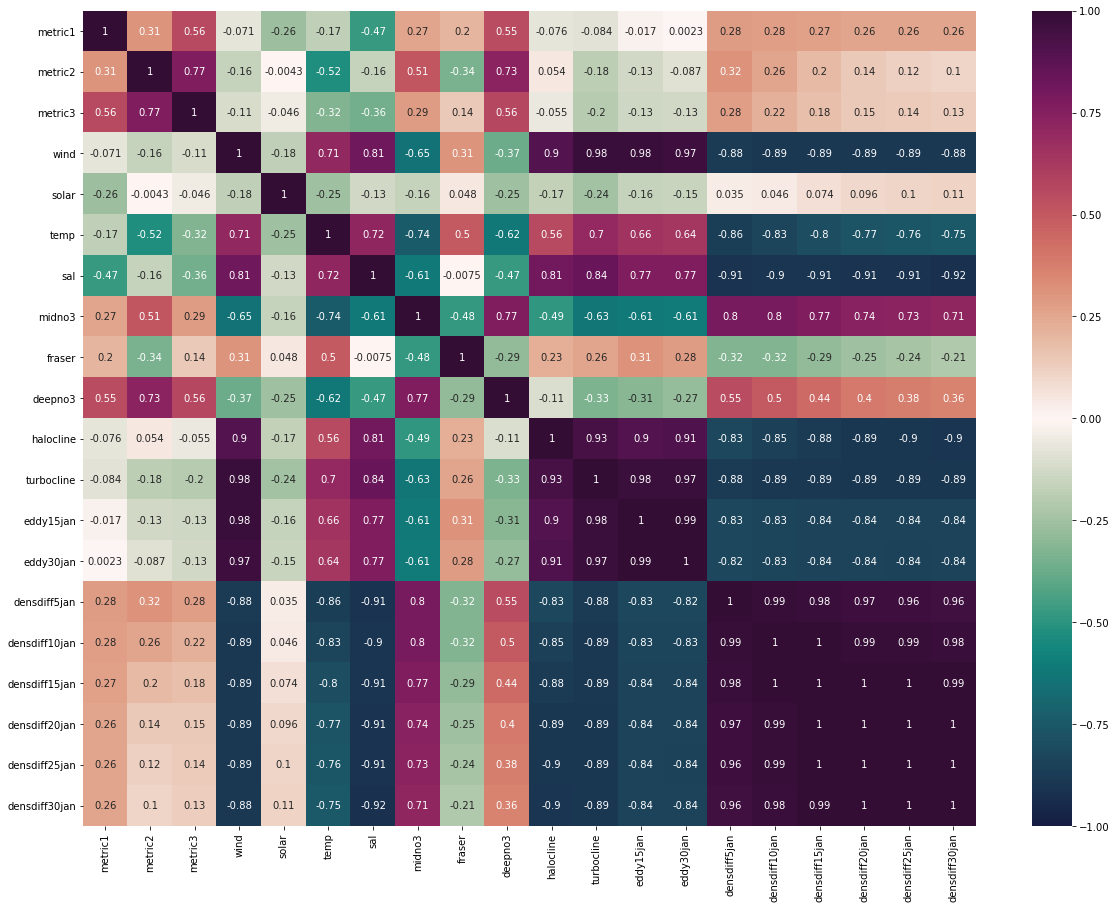

In [13]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfjan.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

### Correlation matrix for February Values

<AxesSubplot:>

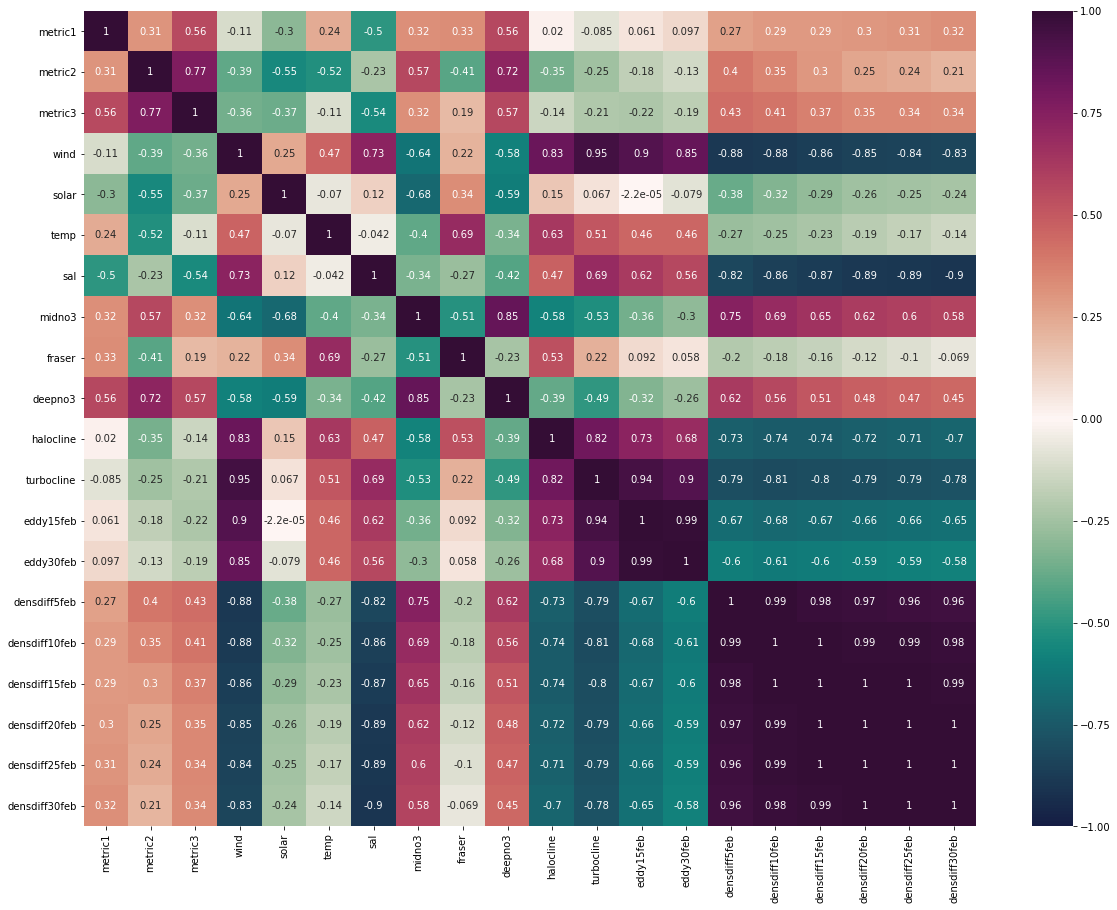

In [14]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dffeb.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

### Correlation matrix for March Values

<AxesSubplot:>

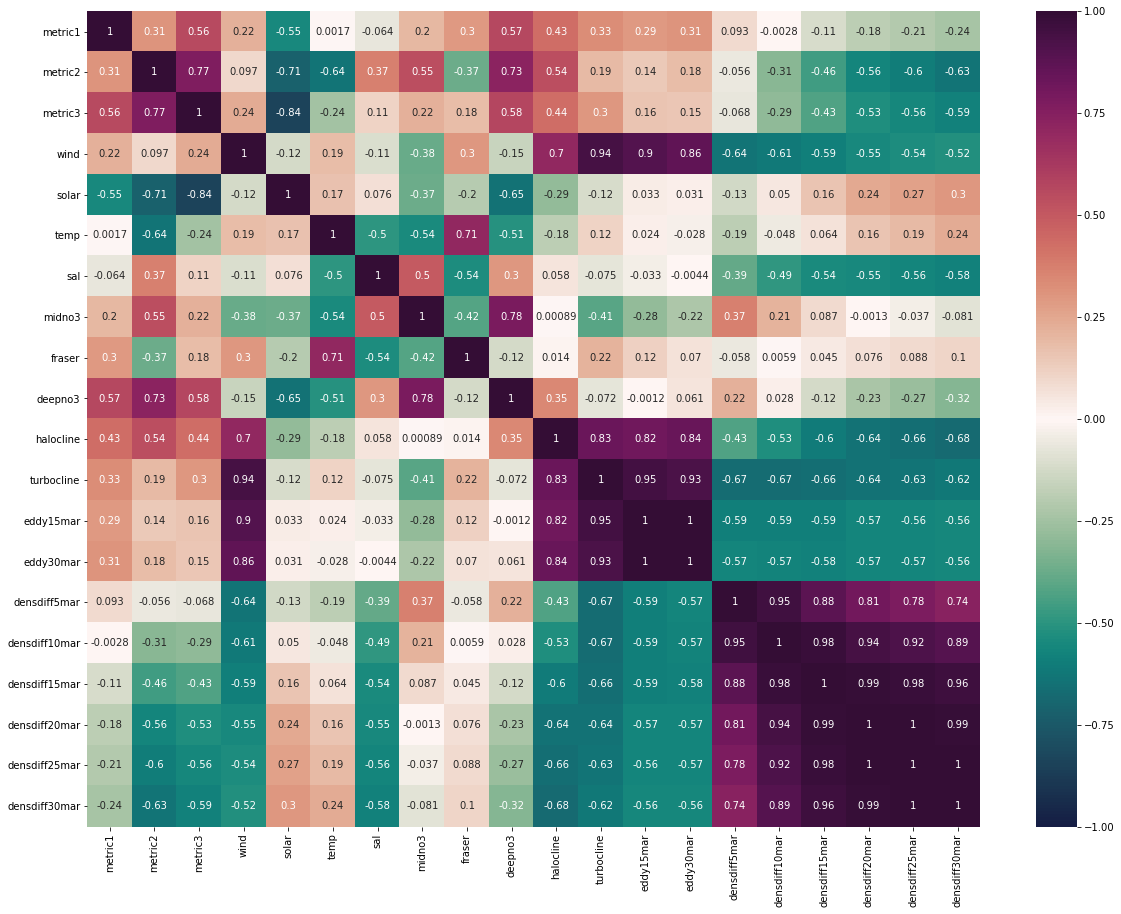

In [15]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfmar.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

### Correlation plots of solar radiation residuals

In [26]:
#  residual calculations for each metric
solarresid1=list()
y,r2,m,b=bloomdrivers.reg_r2(solarmar,yearday1)
for ind,y in enumerate(yearday1):
    x=solarmar[ind]
    solarresid1.append(y-(m*x+b))

solarresid2=list()
y,r2,m,b=bloomdrivers.reg_r2(solarmar,yearday2)
for ind,y in enumerate(yearday2):
    x=solarmar[ind]
    solarresid2.append(y-(m*x+b))
    
solarresid3=list()
y,r2,m,b=bloomdrivers.reg_r2(solarmar,yearday3)
for ind,y in enumerate(yearday3):
    x=solarmar[ind]
    solarresid3.append(y-(m*x+b))

In [27]:
dfsolar=pd.DataFrame({'solar':solarmar,'solarresid1':solarresid1,'solarresid2':solarresid2,'solarresid3':solarresid3,'wind':windmar,
                  'temp':tempmar,'sal':salmar,'midno3':midno3mar,'fraser':frasermar,'deepno3':deepno3mar,'halocine':halomar})

<AxesSubplot:>

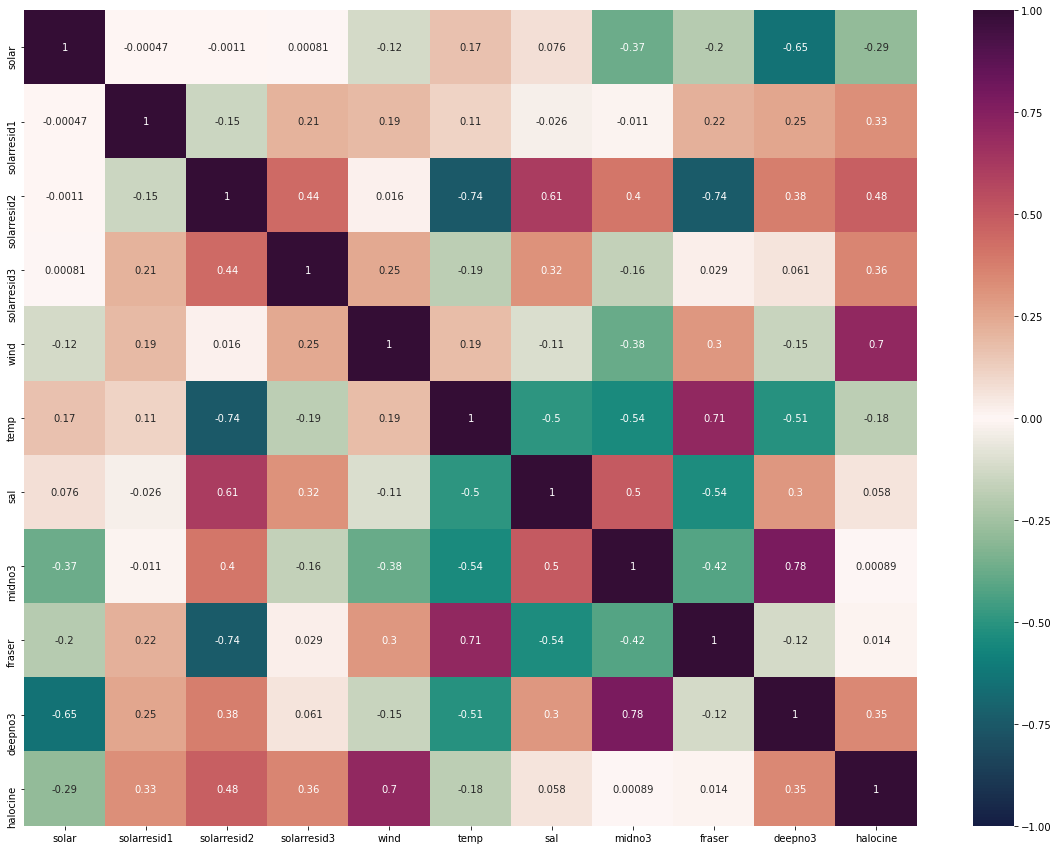

In [28]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfsolar.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

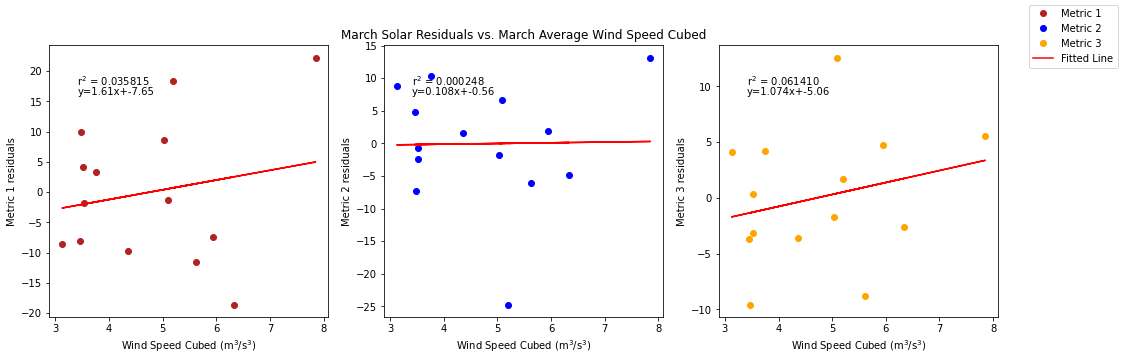

In [29]:
# ---------- wind ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,solarresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,solarresid1)
ax4[0].plot(windmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(windmar,solarresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Solar Residuals vs. March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,solarresid2)
ax4[1].plot(windmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(windmar,solarresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,solarresid3)
ax4[2].plot(windmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

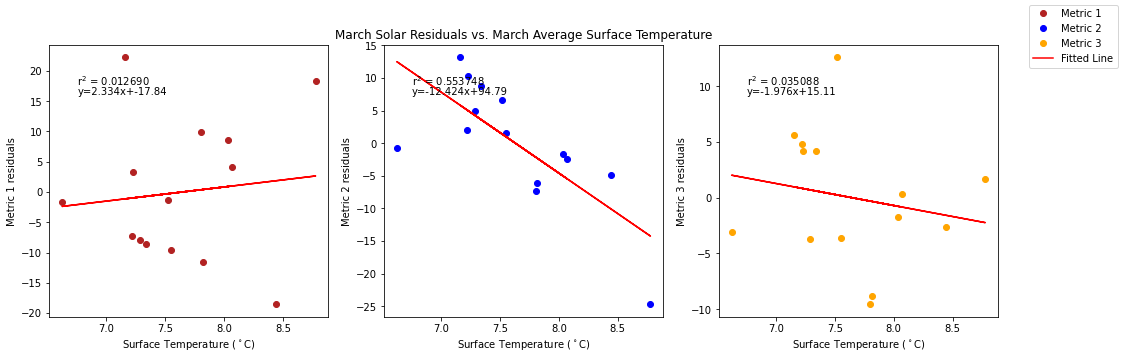

In [30]:
# ---------- Temperature ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(tempmar,solarresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,solarresid1)
ax4[0].plot(tempmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(tempmar,solarresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Solar Residuals vs. March Average Surface Temperature')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,solarresid2)
ax4[1].plot(tempmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(tempmar,solarresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,solarresid3)
ax4[2].plot(tempmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

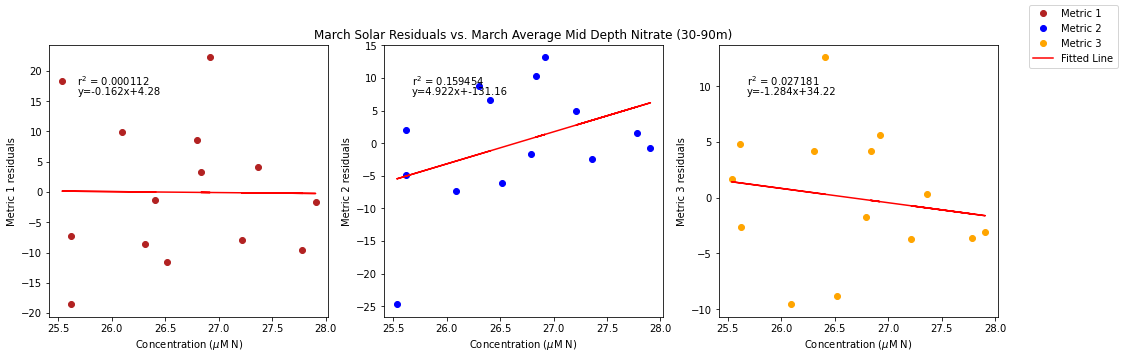

In [31]:
# ---------- Mid NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(midno3mar,solarresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,solarresid1)
ax4[0].plot(midno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(midno3mar,solarresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Solar Residuals vs. March Average Mid Depth Nitrate (30-90m)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,solarresid2)
ax4[1].plot(midno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(midno3mar,solarresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,solarresid3)
ax4[2].plot(midno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

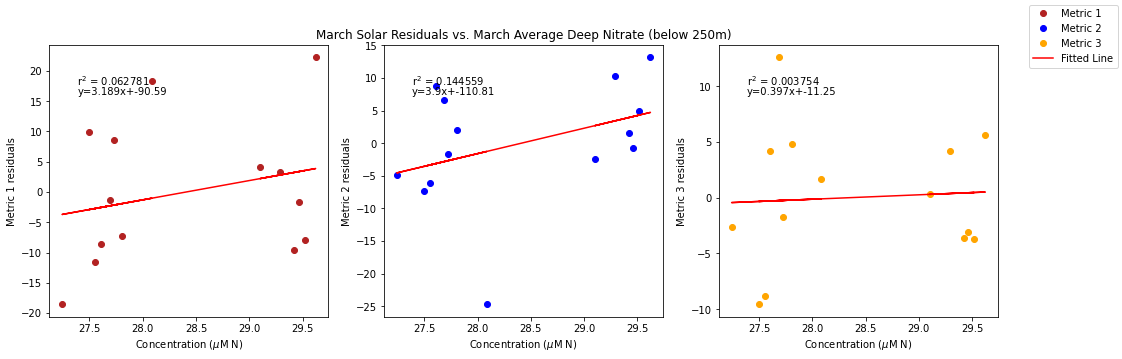

In [32]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(deepno3mar,solarresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,solarresid1)
ax4[0].plot(deepno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(deepno3mar,solarresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Solar Residuals vs. March Average Deep Nitrate (below 250m)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,solarresid2)
ax4[1].plot(deepno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(deepno3mar,solarresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,solarresid3)
ax4[2].plot(deepno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

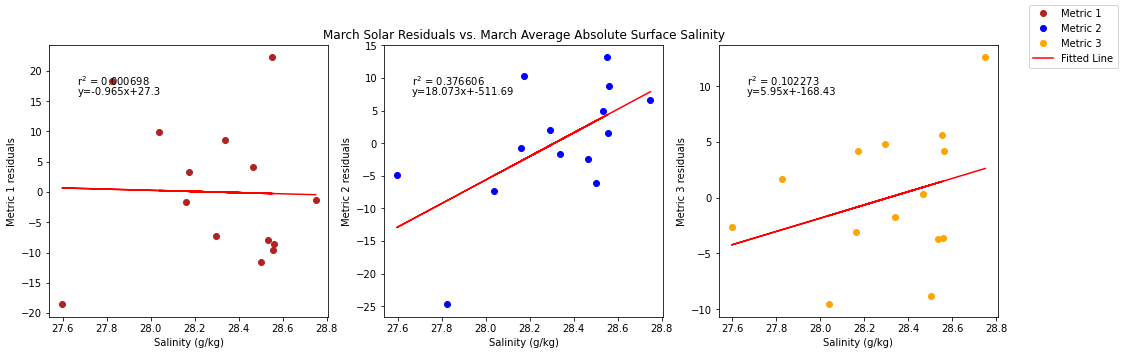

In [33]:
# ---------- Salinity ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,solarresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,solarresid1)
ax4[0].plot(salmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(salmar,solarresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Solar Residuals vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,solarresid2)
ax4[1].plot(salmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(salmar,solarresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,solarresid3)
ax4[2].plot(salmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

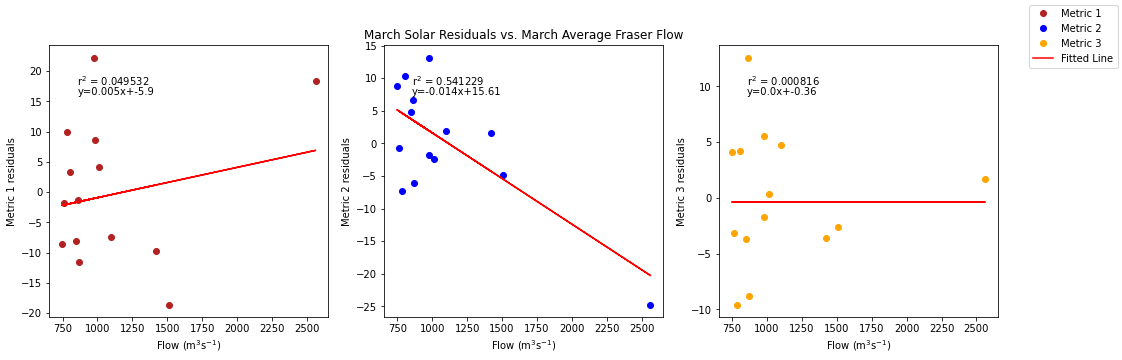

In [34]:
# ---------- Fraser ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(frasermar,solarresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,solarresid1)
ax4[0].plot(frasermar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(frasermar,solarresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Solar Residuals vs. March Average Fraser Flow')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,solarresid2)
ax4[1].plot(frasermar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(frasermar,solarresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,solarresid3)
ax4[2].plot(frasermar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

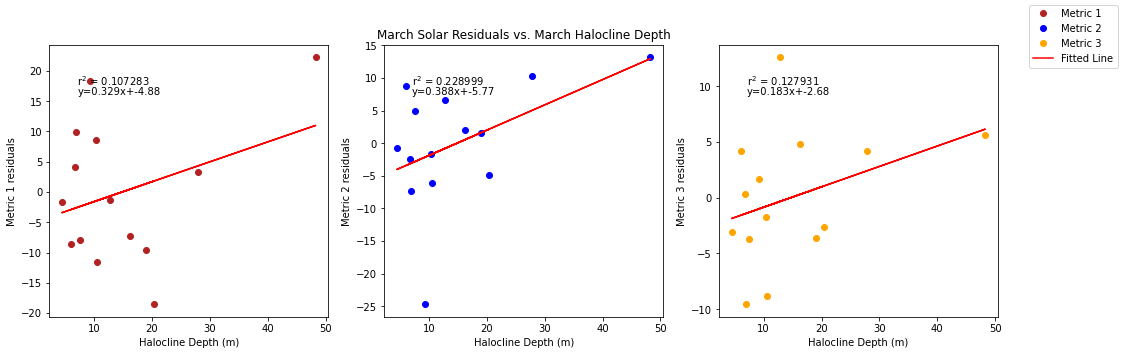

In [35]:
# ---------- Halocline ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(halomar,solarresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Halocline Depth (m)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,solarresid1)
ax4[0].plot(halomar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(halomar,solarresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Halocline Depth (m)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Solar Residuals vs. March Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halomar,solarresid2)
ax4[1].plot(halomar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(halomar,solarresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Halocline Depth (m)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,solarresid3)
ax4[2].plot(halomar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

### Correlation plots of deep NO3 residuals

In [56]:
#  residual calculations for each metric
deepno3resid1=list()
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,yearday1)
for ind,y in enumerate(yearday1):
    x=deepno3mar[ind]
    deepno3resid1.append(y-(m*x+b))

deepno3resid2=list()
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,yearday2)
for ind,y in enumerate(yearday2):
    x=deepno3mar[ind]
    deepno3resid2.append(y-(m*x+b))
    
deepno3resid3=list()
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,yearday3)
for ind,y in enumerate(yearday3):
    x=deepno3mar[ind]
    deepno3resid3.append(y-(m*x+b))

In [57]:
dfdeepno3=pd.DataFrame({'deepno3':deepno3mar,'deepno3resid1':deepno3resid1,'deepno3resid2':deepno3resid2,'deepno3resid3':deepno3resid3,'wind':windmar,'solar':solarmar,
                        'temp':tempmar,'sal':salmar,'fraser':frasermar,'midno3':midno3mar,'halocine':halomar})

<AxesSubplot:>

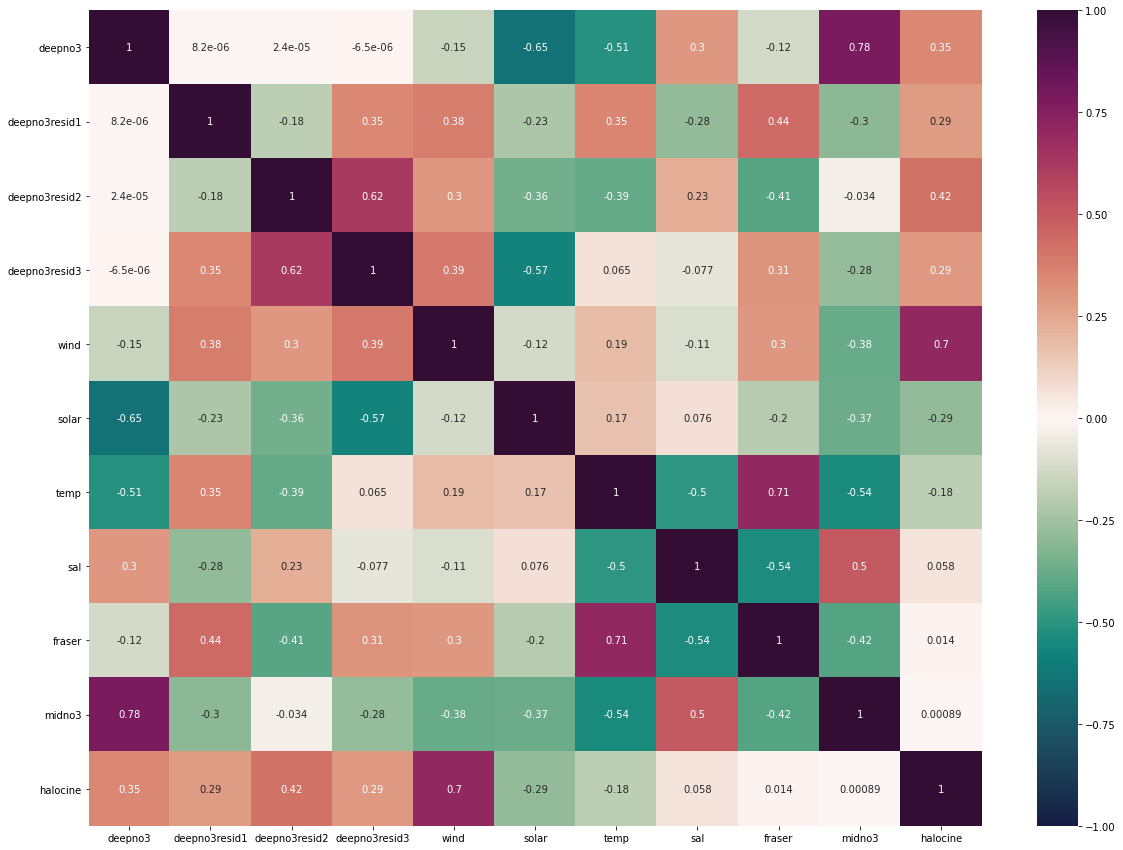

In [58]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfdeepno3.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

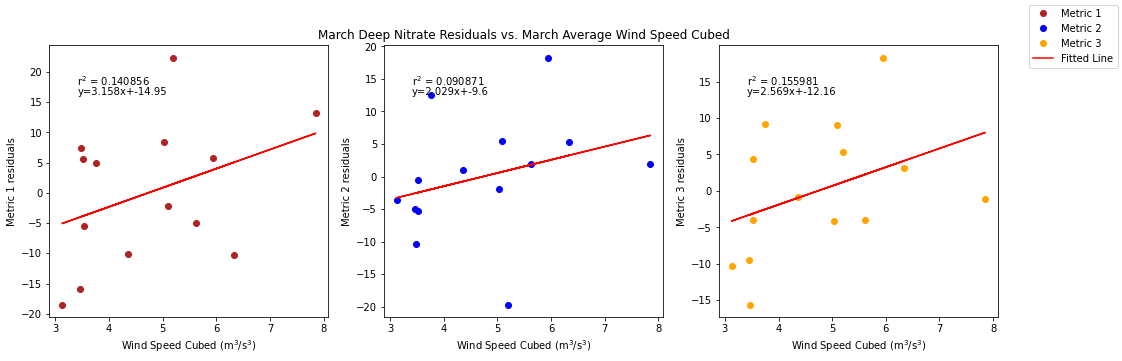

In [59]:
# ---------- wind ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,deepno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,deepno3resid1)
ax4[0].plot(windmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(windmar,deepno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Deep Nitrate Residuals vs. March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,deepno3resid2)
ax4[1].plot(windmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(windmar,deepno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,deepno3resid3)
ax4[2].plot(windmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

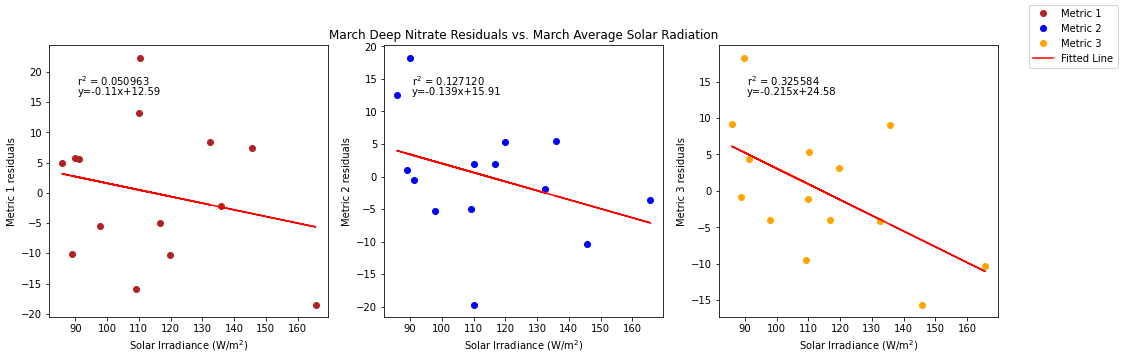

In [60]:
# ---------- Solar ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(solarmar,deepno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,deepno3resid1)
ax4[0].plot(solarmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(solarmar,deepno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Deep Nitrate Residuals vs. March Average Solar Radiation')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,deepno3resid2)
ax4[1].plot(solarmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(solarmar,deepno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,deepno3resid3)
ax4[2].plot(solarmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

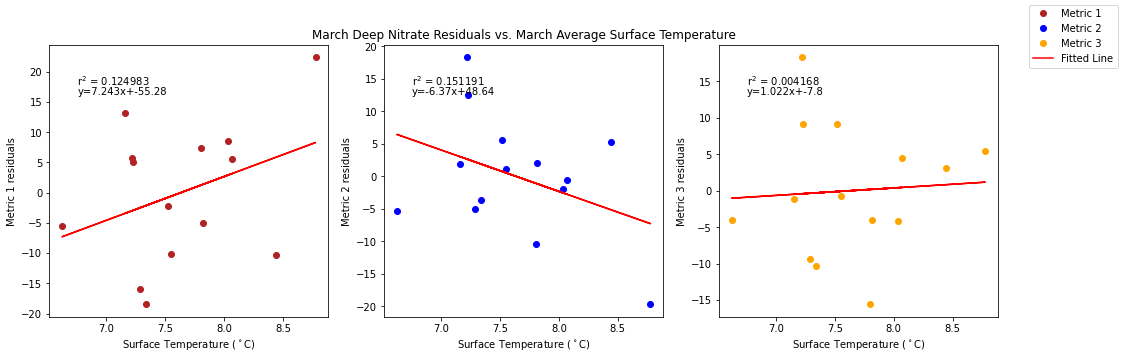

In [61]:
# ---------- Temperature ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(tempmar,deepno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,deepno3resid1)
ax4[0].plot(tempmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(tempmar,deepno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Deep Nitrate Residuals vs. March Average Surface Temperature')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,deepno3resid2)
ax4[1].plot(tempmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(tempmar,deepno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,deepno3resid3)
ax4[2].plot(tempmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

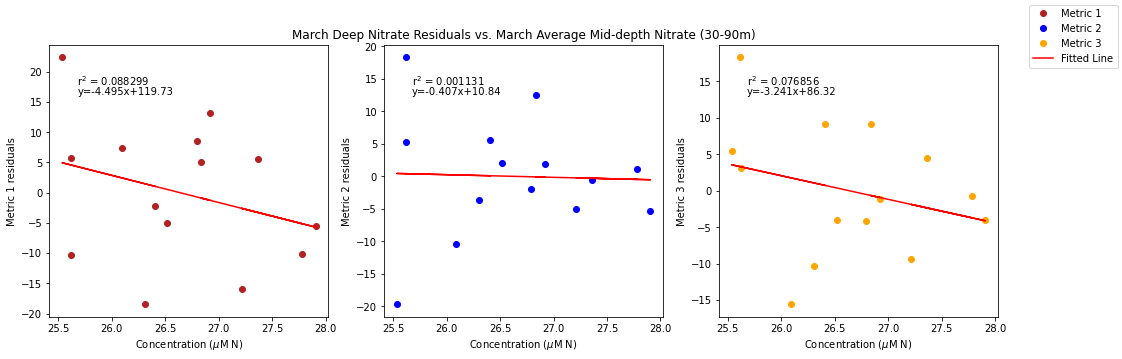

In [62]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(midno3mar,deepno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,deepno3resid1)
ax4[0].plot(midno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(midno3mar,deepno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Deep Nitrate Residuals vs. March Average Mid-depth Nitrate (30-90m)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,deepno3resid2)
ax4[1].plot(midno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(midno3mar,deepno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,deepno3resid3)
ax4[2].plot(midno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

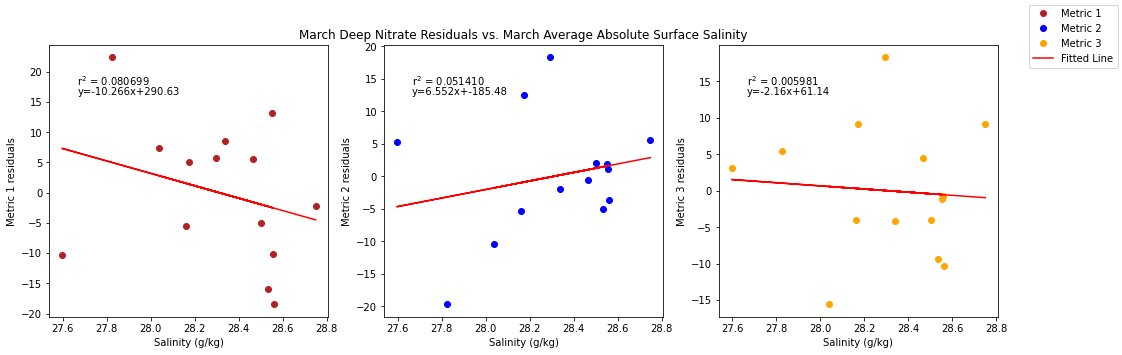

In [63]:
# ---------- Salinity ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,deepno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,deepno3resid1)
ax4[0].plot(salmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(salmar,deepno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Deep Nitrate Residuals vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,deepno3resid2)
ax4[1].plot(salmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(salmar,deepno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,deepno3resid3)
ax4[2].plot(salmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

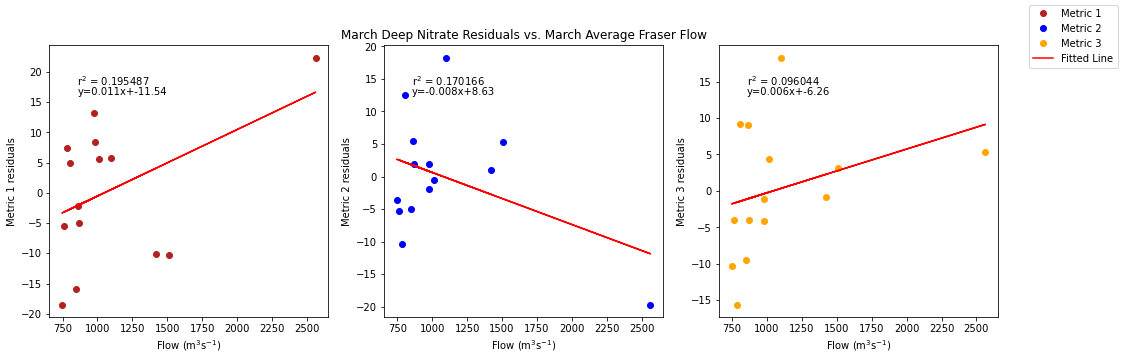

In [64]:
# ---------- Fraser ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(frasermar,deepno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,deepno3resid1)
ax4[0].plot(frasermar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(frasermar,deepno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Deep Nitrate Residuals vs. March Average Fraser Flow')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,deepno3resid2)
ax4[1].plot(frasermar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(frasermar,deepno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,deepno3resid3)
ax4[2].plot(frasermar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

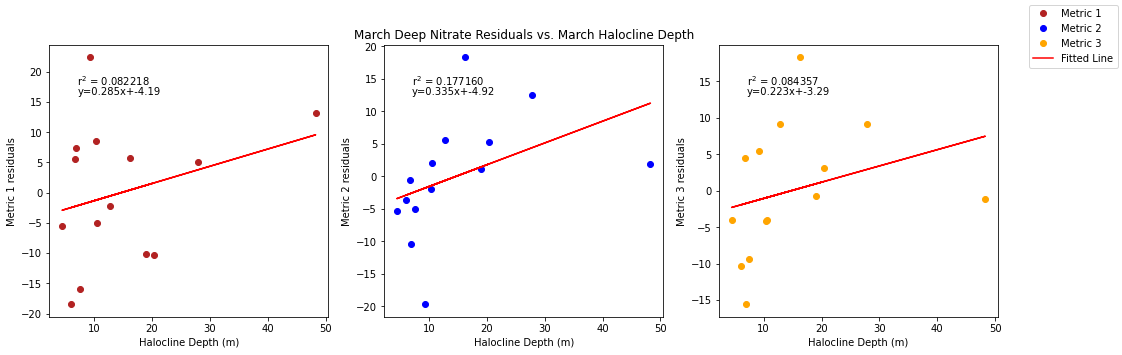

In [65]:
# ---------- Halocline ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(halomar,deepno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Halocline Depth (m)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,deepno3resid1)
ax4[0].plot(halomar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(halomar,deepno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Halocline Depth (m)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Deep Nitrate Residuals vs. March Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halomar,deepno3resid2)
ax4[1].plot(halomar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(halomar,deepno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Halocline Depth (m)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,deepno3resid3)
ax4[2].plot(halomar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

### Correlation plots of halocline depth residuals

In [86]:
#  residual calculations for each metric
haloresid1=list()
y,r2,m,b=bloomdrivers.reg_r2(halomar,yearday1)
for ind,y in enumerate(yearday1):
    x=halomar[ind]
    haloresid1.append(y-(m*x+b))

haloresid2=list()
y,r2,m,b=bloomdrivers.reg_r2(halomar,yearday2)
for ind,y in enumerate(yearday2):
    x=halomar[ind]
    haloresid2.append(y-(m*x+b))
    
haloresid3=list()
y,r2,m,b=bloomdrivers.reg_r2(halomar,yearday3)
for ind,y in enumerate(yearday3):
    x=halomar[ind]
    haloresid3.append(y-(m*x+b))

In [87]:
dfhalo=pd.DataFrame({'halocine':halomar,'haloresid1':haloresid1,'haloresid2':haloresid2,'haloresid3':haloresid3,'wind':windmar,'solar':solarmar,
                    'temp':tempmar,'fraser':frasermar,'midno3':midno3mar,'deepno3':deepno3mar,'sal':salmar})

<AxesSubplot:>

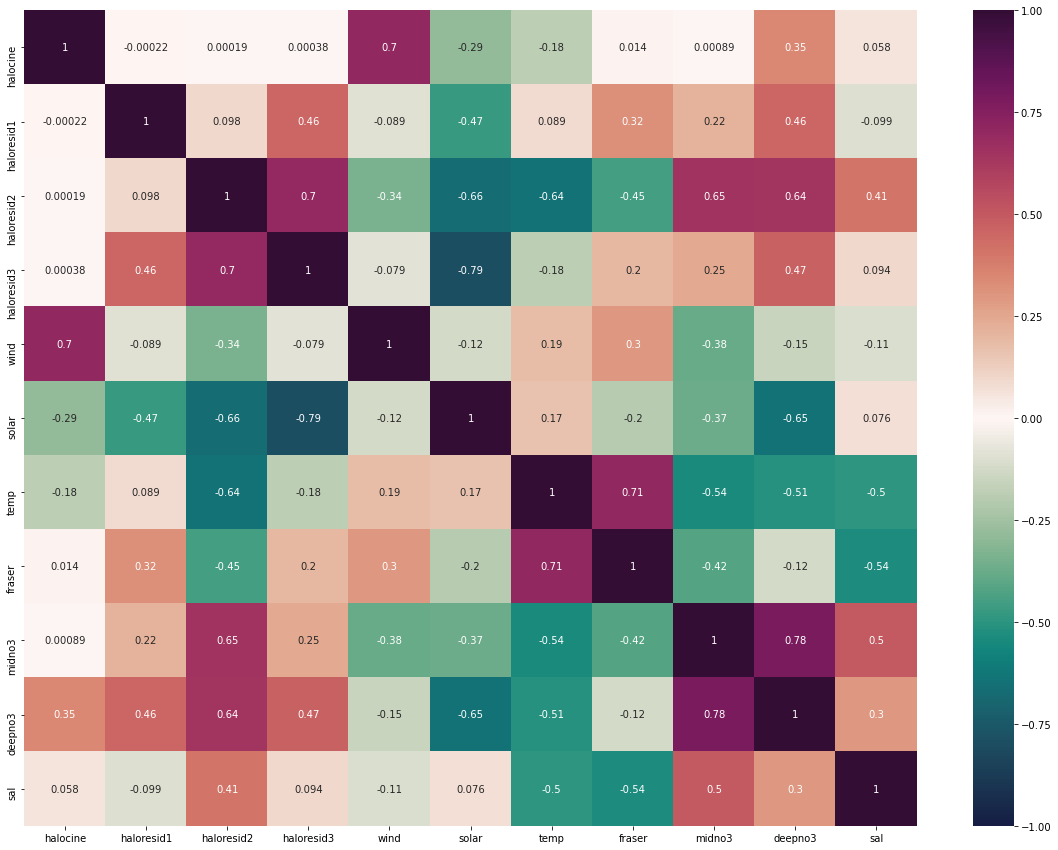

In [88]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfhalo.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

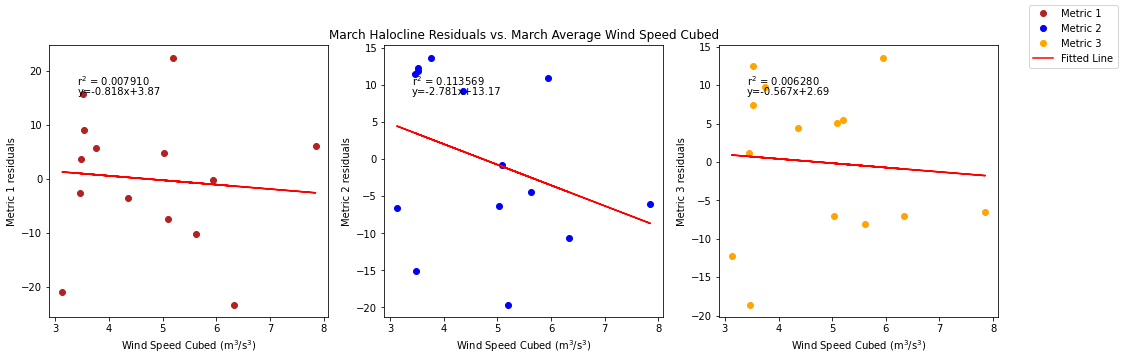

In [89]:
# ---------- wind ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,haloresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,haloresid1)
ax4[0].plot(windmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(windmar,haloresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Halocline Residuals vs. March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,haloresid2)
ax4[1].plot(windmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(windmar,haloresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,haloresid3)
ax4[2].plot(windmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

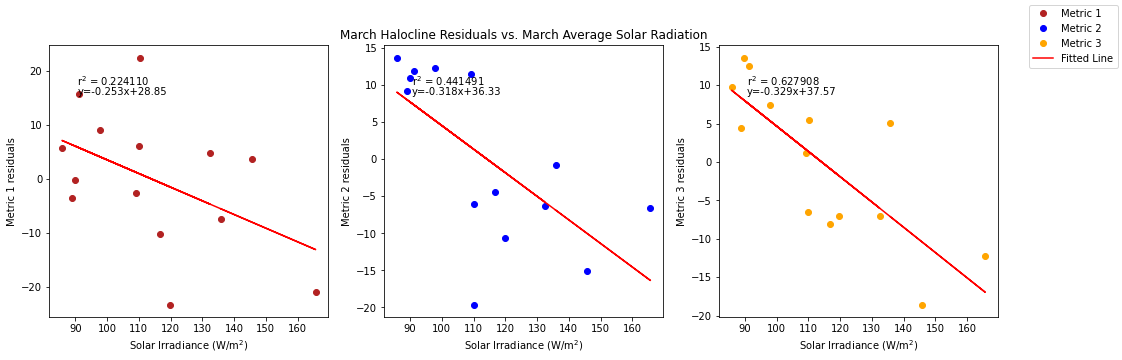

In [90]:
# ---------- Solar ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(solarmar, haloresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,haloresid1)
ax4[0].plot(solarmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(solarmar,haloresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Halocline Residuals vs. March Average Solar Radiation')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,haloresid2)
ax4[1].plot(solarmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(solarmar,haloresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,haloresid3)
ax4[2].plot(solarmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

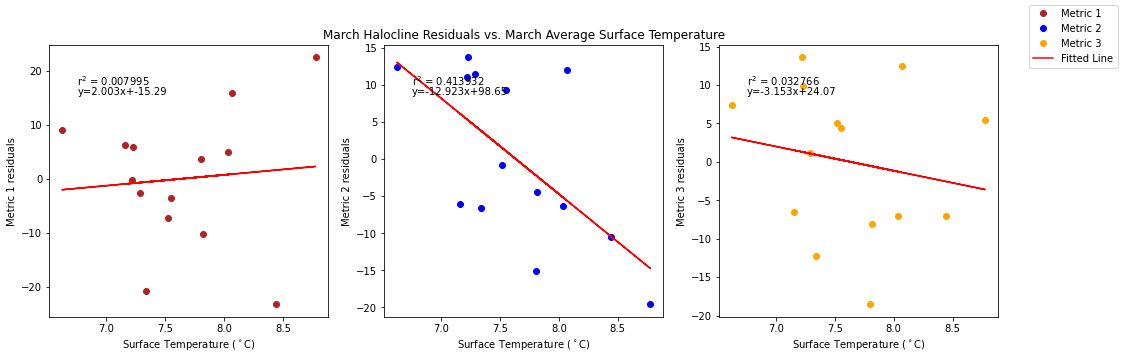

In [91]:
# ---------- Temperature ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(tempmar,haloresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,haloresid1)
ax4[0].plot(tempmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(tempmar,haloresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Halocline Residuals vs. March Average Surface Temperature')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,haloresid2)
ax4[1].plot(tempmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(tempmar,haloresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,haloresid3)
ax4[2].plot(tempmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

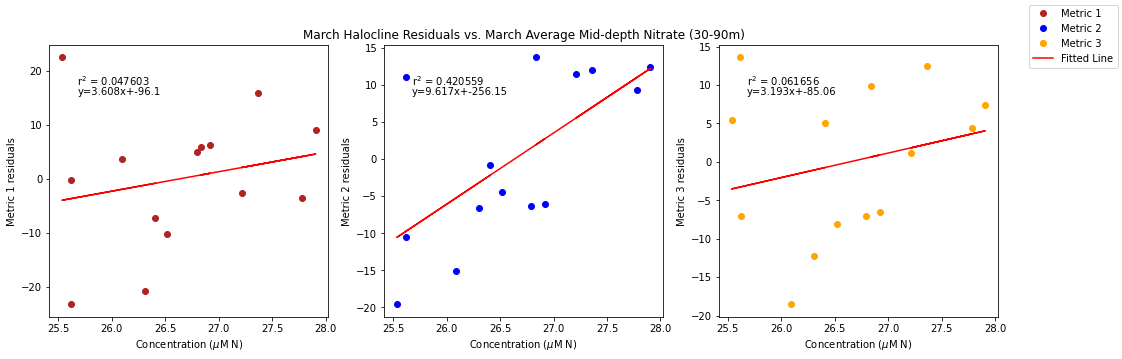

In [92]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(midno3mar,haloresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,haloresid1)
ax4[0].plot(midno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(midno3mar,haloresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Halocline Residuals vs. March Average Mid-depth Nitrate (30-90m)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,haloresid2)
ax4[1].plot(midno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(midno3mar,haloresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,haloresid3)
ax4[2].plot(midno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

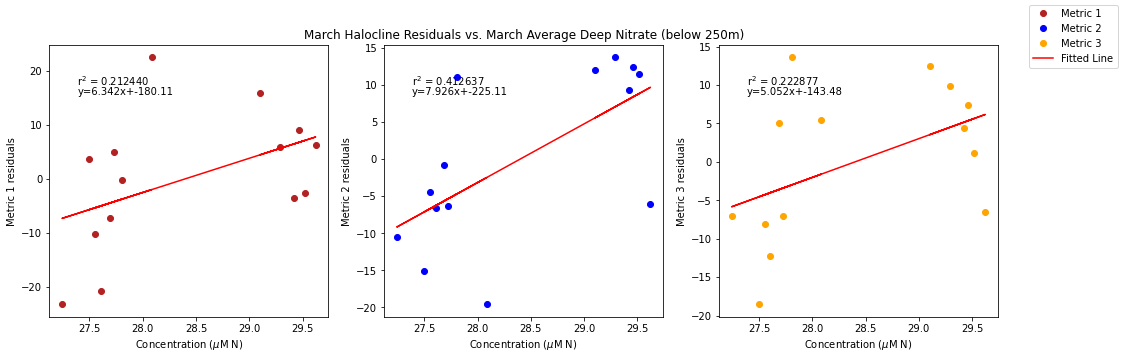

In [93]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(deepno3mar,haloresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,haloresid1)
ax4[0].plot(deepno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(deepno3mar,haloresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Halocline Residuals vs. March Average Deep Nitrate (below 250m)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,haloresid2)
ax4[1].plot(deepno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(deepno3mar,haloresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,haloresid3)
ax4[2].plot(deepno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

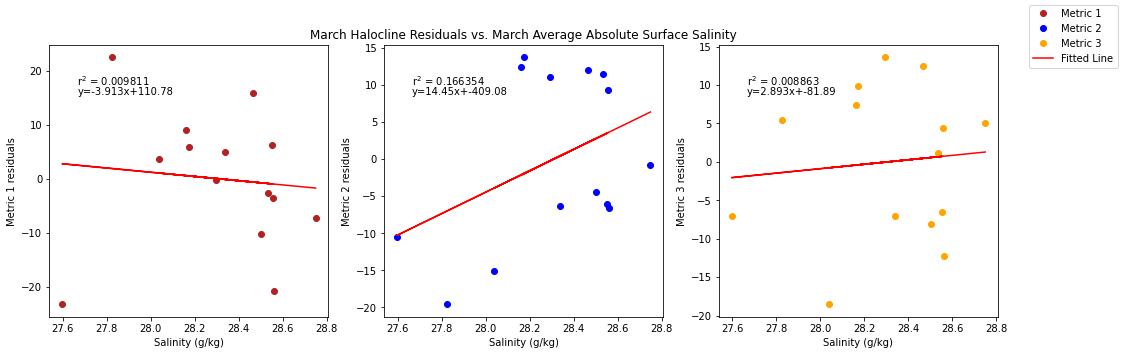

In [94]:
# ---------- Salinity ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,haloresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,haloresid1)
ax4[0].plot(salmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(salmar,haloresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Halocline Residuals vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,haloresid2)
ax4[1].plot(salmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(salmar,haloresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,haloresid3)
ax4[2].plot(salmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

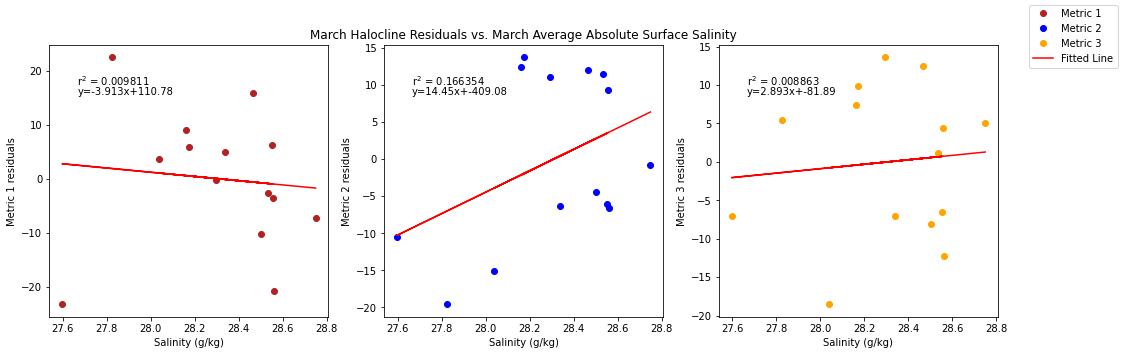

In [95]:
# ---------- Salinity ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,haloresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,haloresid1)
ax4[0].plot(salmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(salmar,haloresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Halocline Residuals vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,haloresid2)
ax4[1].plot(salmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(salmar,haloresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,haloresid3)
ax4[2].plot(salmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

### Correlation plots of salinity residuals

In [66]:
#  residual calculations for each metric
salresid1=list()
y,r2,m,b=bloomdrivers.reg_r2(salmar,yearday1)
for ind,y in enumerate(yearday1):
    x=salmar[ind]
    salresid1.append(y-(m*x+b))

salresid2=list()
y,r2,m,b=bloomdrivers.reg_r2(salmar,yearday2)
for ind,y in enumerate(yearday2):
    x=salmar[ind]
    salresid2.append(y-(m*x+b))
    
salresid3=list()
y,r2,m,b=bloomdrivers.reg_r2(salmar,yearday3)
for ind,y in enumerate(yearday3):
    x=salmar[ind]
    salresid3.append(y-(m*x+b))

In [67]:
dfsal=pd.DataFrame({'sal':salmar,'salresid1':salresid1,'salresid2':salresid2,'salresid3':salresid3,'wind':windmar,'solar':solarmar,
                    'temp':tempmar,'fraser':frasermar,'midno3':midno3mar,'deepno3':deepno3mar,'halocine':halomar})

<AxesSubplot:>

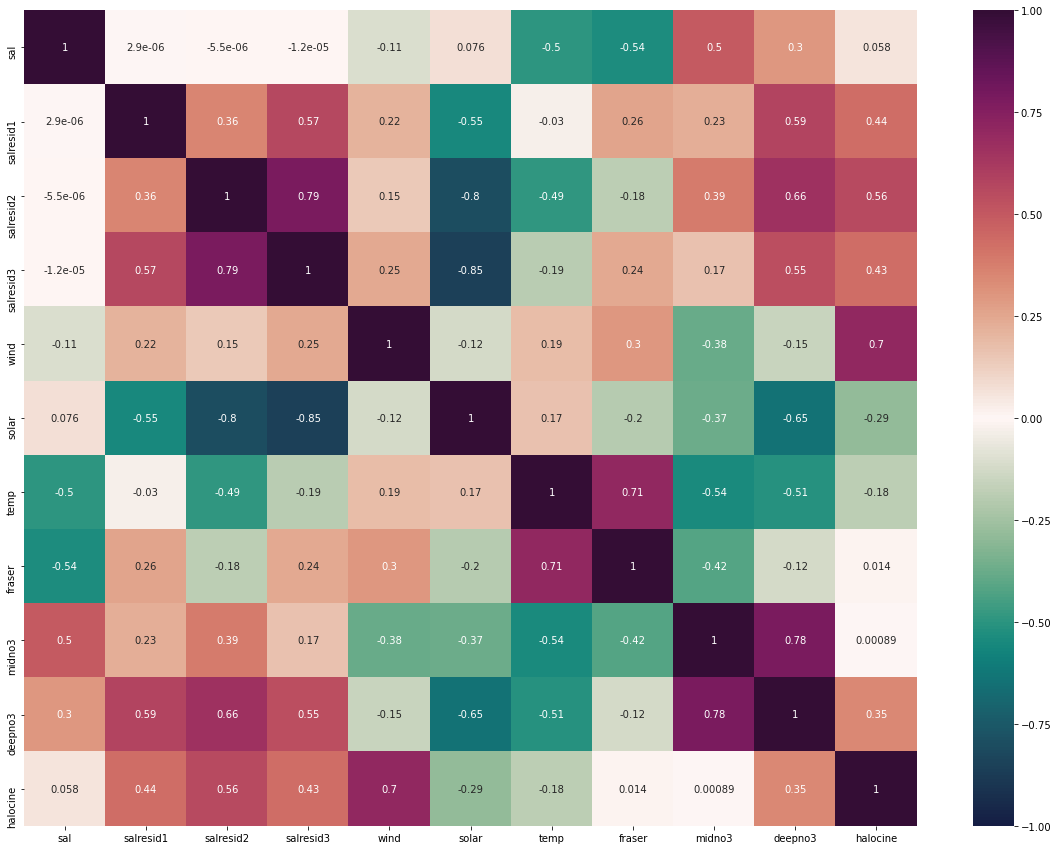

In [68]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfsal.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

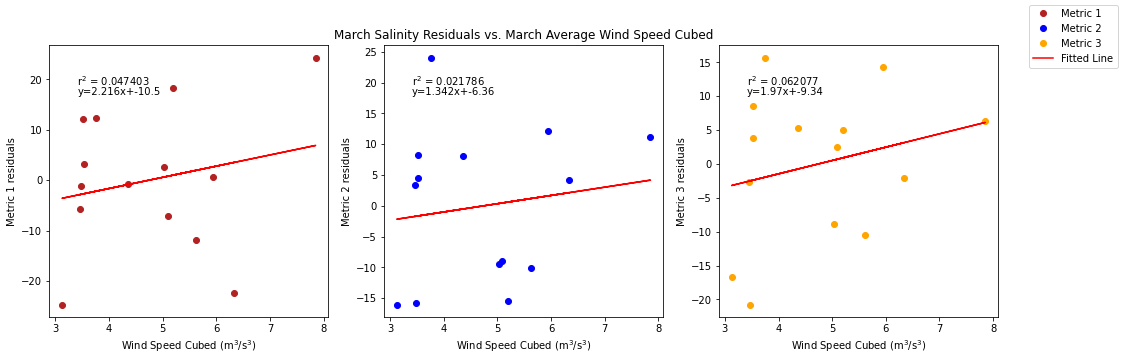

In [69]:
# ---------- wind ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,salresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,salresid1)
ax4[0].plot(windmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(windmar,salresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Salinity Residuals vs. March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,salresid2)
ax4[1].plot(windmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(windmar,salresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,salresid3)
ax4[2].plot(windmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

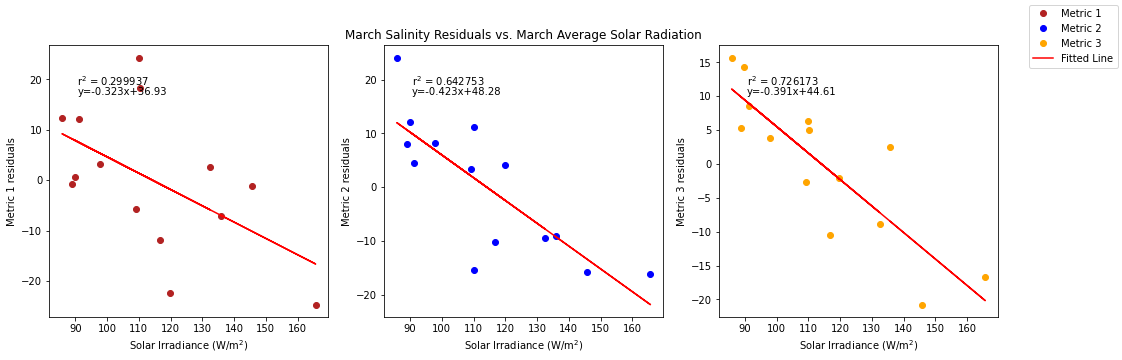

In [70]:
# ---------- Solar ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(solarmar,salresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,salresid1)
ax4[0].plot(solarmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(solarmar,salresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Salinity Residuals vs. March Average Solar Radiation')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,salresid2)
ax4[1].plot(solarmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(solarmar,salresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,salresid3)
ax4[2].plot(solarmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

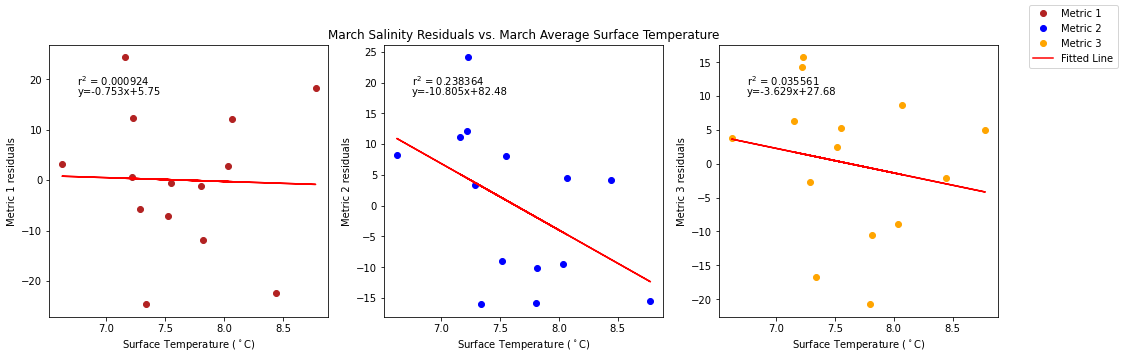

In [71]:
# ---------- Temperature ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(tempmar,salresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,salresid1)
ax4[0].plot(tempmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(tempmar,salresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Salinity Residuals vs. March Average Surface Temperature')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,salresid2)
ax4[1].plot(tempmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(tempmar,salresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,salresid3)
ax4[2].plot(tempmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

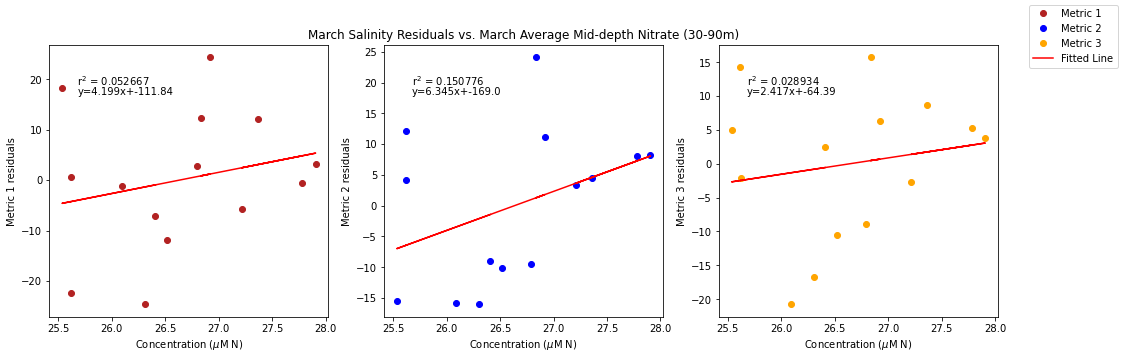

In [72]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(midno3mar,salresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,salresid1)
ax4[0].plot(midno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(midno3mar,salresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Salinity Residuals vs. March Average Mid-depth Nitrate (30-90m)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,salresid2)
ax4[1].plot(midno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(midno3mar,salresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,salresid3)
ax4[2].plot(midno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

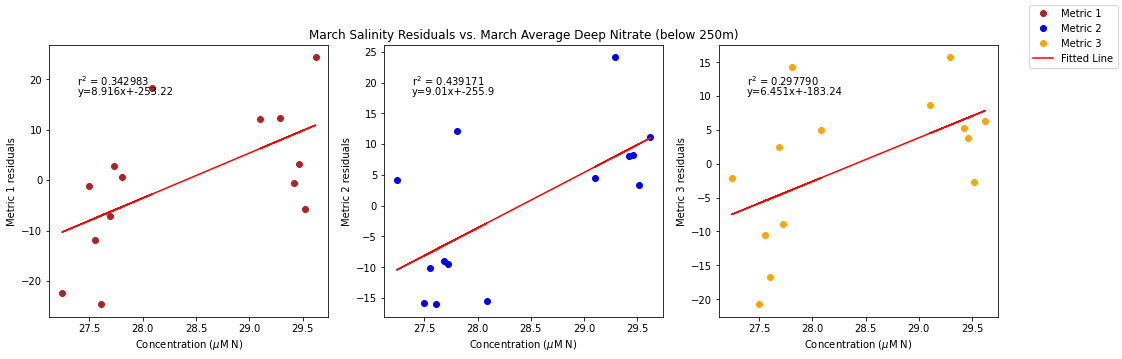

In [73]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(deepno3mar,salresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,salresid1)
ax4[0].plot(deepno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(deepno3mar,salresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Salinity Residuals vs. March Average Deep Nitrate (below 250m)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,salresid2)
ax4[1].plot(deepno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(deepno3mar,salresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,salresid3)
ax4[2].plot(deepno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

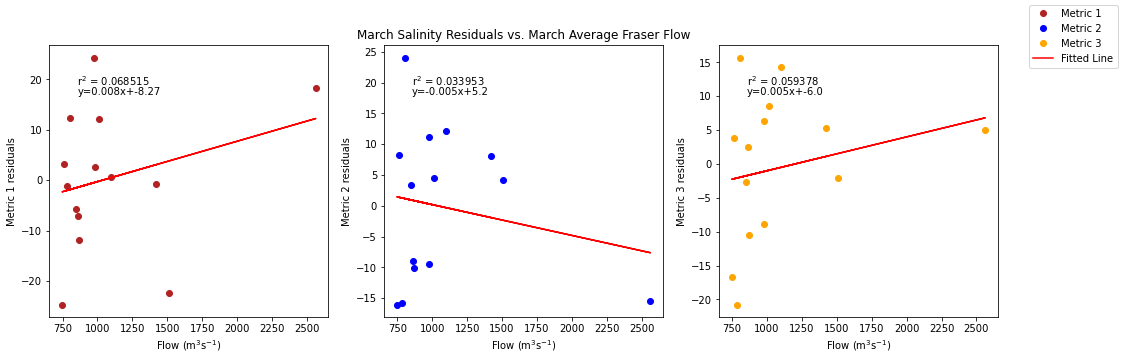

In [74]:
# ---------- Fraser ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(frasermar,salresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,salresid1)
ax4[0].plot(frasermar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(frasermar,salresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Salinity Residuals vs. March Average Fraser Flow')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,salresid2)
ax4[1].plot(frasermar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(frasermar,salresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,salresid3)
ax4[2].plot(frasermar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

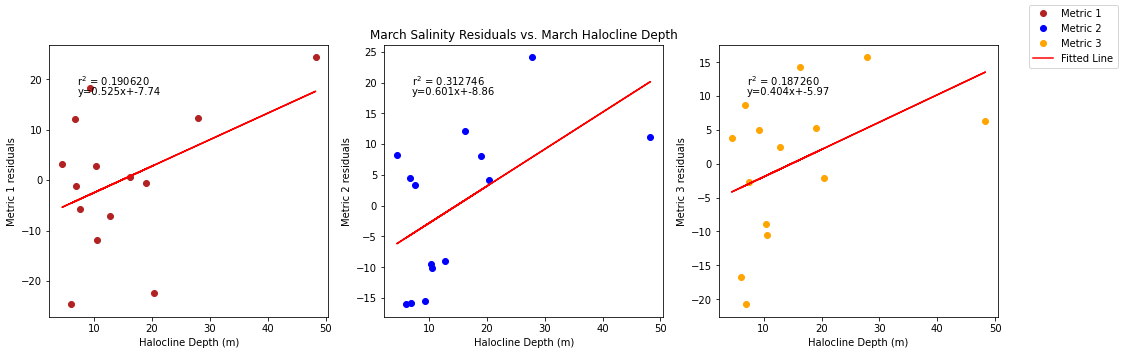

In [75]:
# ---------- Halocline ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(halomar,salresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Halocline Depth (m)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,salresid1)
ax4[0].plot(halomar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(halomar,salresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Halocline Depth (m)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Salinity Residuals vs. March Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halomar,salresid2)
ax4[1].plot(halomar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(halomar,salresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Halocline Depth (m)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,salresid3)
ax4[2].plot(halomar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

### Correlation plots of temperature residuals

In [36]:
#  residual calculations for each metric
tempresid1=list()
y,r2,m,b=bloomdrivers.reg_r2(tempmar,yearday1)
for ind,y in enumerate(yearday1):
    x=tempmar[ind]
    tempresid1.append(y-(m*x+b))

tempresid2=list()
y,r2,m,b=bloomdrivers.reg_r2(tempmar,yearday2)
for ind,y in enumerate(yearday2):
    x=tempmar[ind]
    tempresid2.append(y-(m*x+b))
    
tempresid3=list()
y,r2,m,b=bloomdrivers.reg_r2(tempmar,yearday3)
for ind,y in enumerate(yearday3):
    x=tempmar[ind]
    tempresid3.append(y-(m*x+b))

In [37]:
dftemp=pd.DataFrame({'temp':tempmar,'tempresid1':tempresid1,'tempresid2':tempresid2,'tempresid3':tempresid3,'wind':windmar,'solar':solarmar,
                  'sal':salmar,'midno3':midno3mar,'fraser':frasermar,'deepno3':deepno3mar,'halocine':halomar})

<AxesSubplot:>

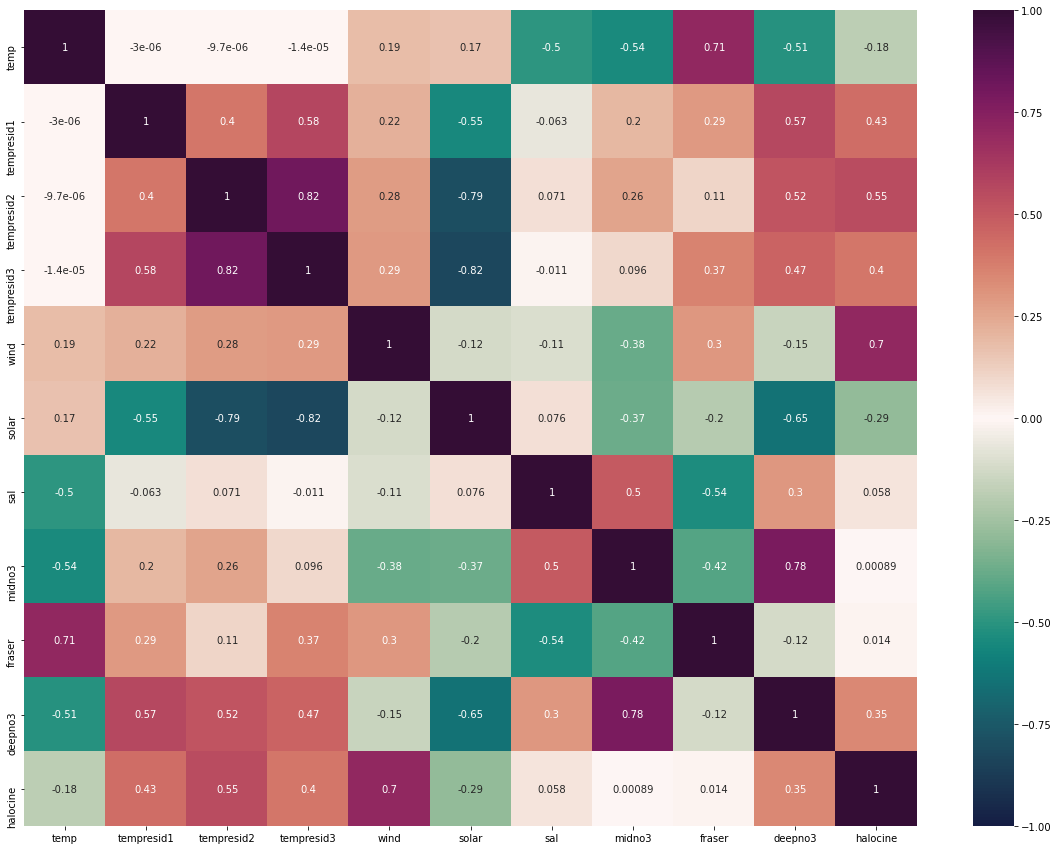

In [38]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dftemp.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

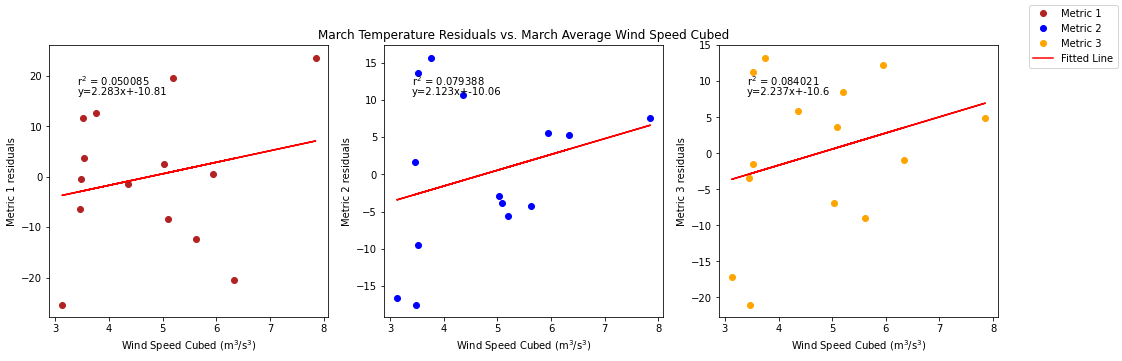

In [39]:
# ---------- wind ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,tempresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,tempresid1)
ax4[0].plot(windmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(windmar,tempresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Temperature Residuals vs. March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,tempresid2)
ax4[1].plot(windmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(windmar,tempresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,tempresid3)
ax4[2].plot(windmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

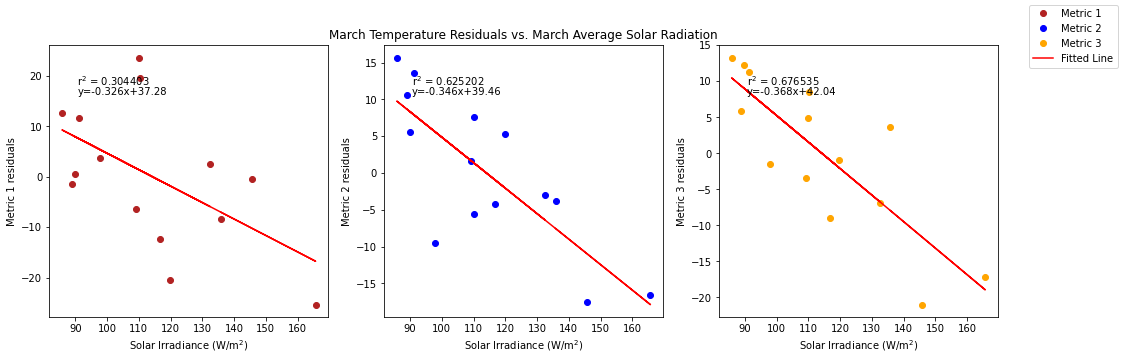

In [40]:
# ---------- Solar ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(solarmar,tempresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,tempresid1)
ax4[0].plot(solarmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(solarmar,tempresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Temperature Residuals vs. March Average Solar Radiation')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,tempresid2)
ax4[1].plot(solarmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(solarmar,tempresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,tempresid3)
ax4[2].plot(solarmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

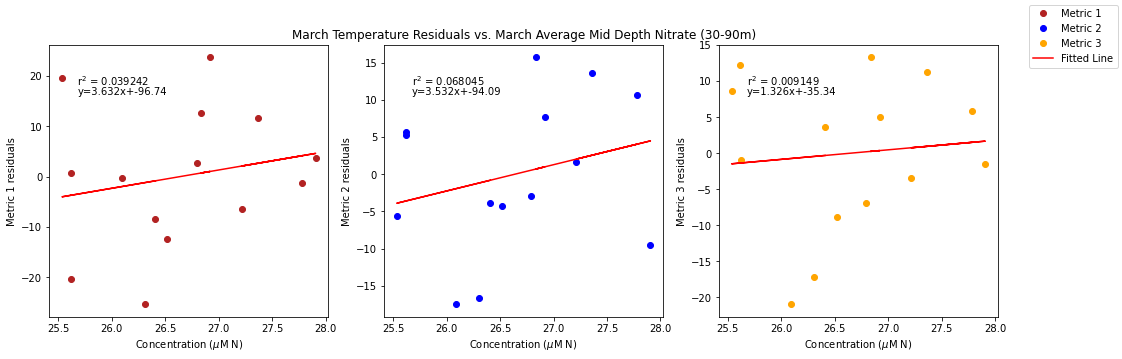

In [41]:
# ---------- Mid NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(midno3mar,tempresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,tempresid1)
ax4[0].plot(midno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(midno3mar,tempresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Temperature Residuals vs. March Average Mid Depth Nitrate (30-90m)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,tempresid2)
ax4[1].plot(midno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(midno3mar,tempresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,tempresid3)
ax4[2].plot(midno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

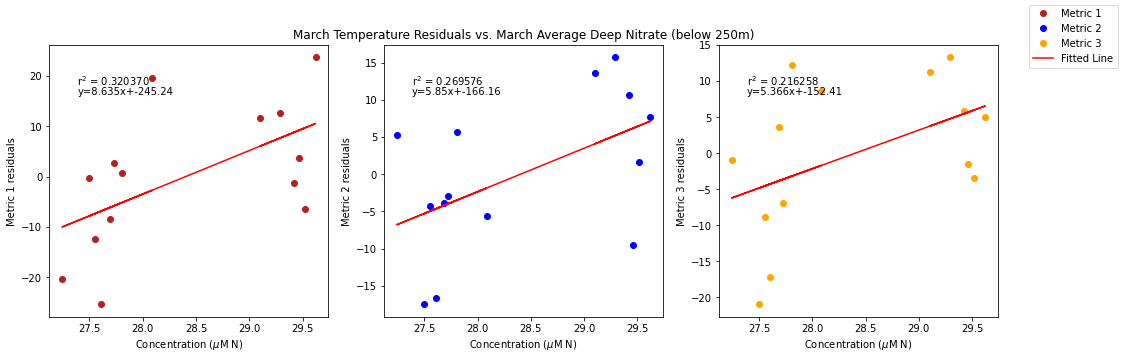

In [42]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(deepno3mar,tempresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,tempresid1)
ax4[0].plot(deepno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(deepno3mar,tempresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Temperature Residuals vs. March Average Deep Nitrate (below 250m)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,tempresid2)
ax4[1].plot(deepno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(deepno3mar,tempresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,tempresid3)
ax4[2].plot(deepno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

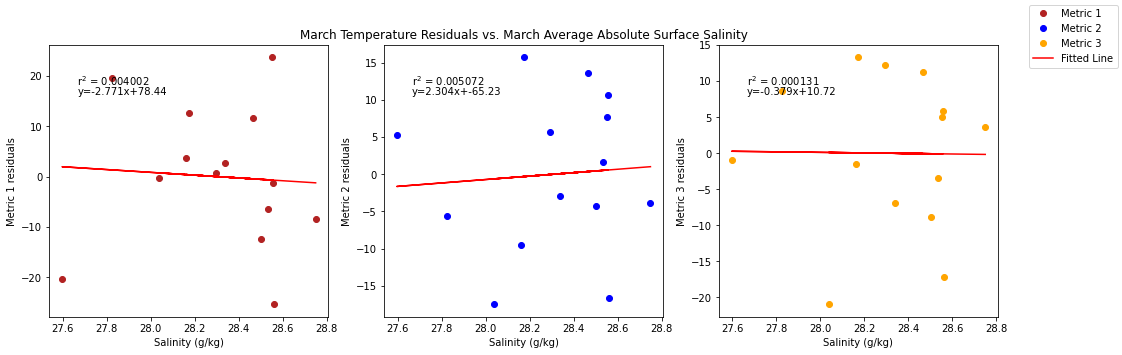

In [43]:
# ---------- Salinity ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,tempresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,tempresid1)
ax4[0].plot(salmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(salmar,tempresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Temperature Residuals vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,tempresid2)
ax4[1].plot(salmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(salmar,tempresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,tempresid3)
ax4[2].plot(salmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

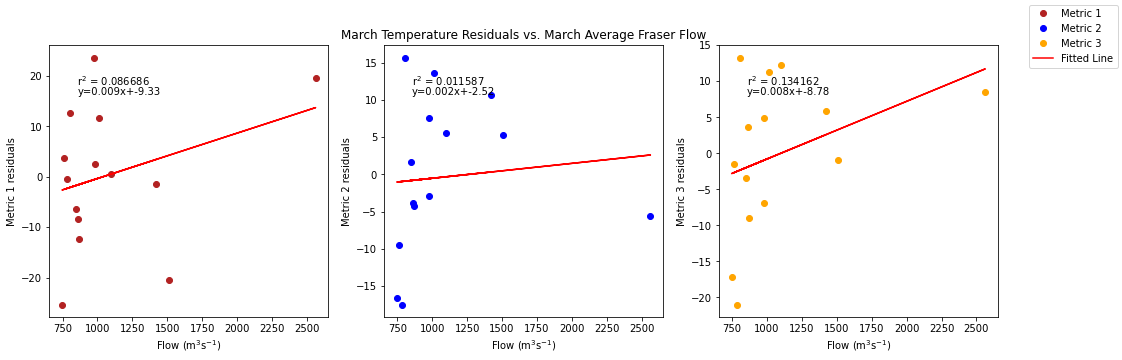

In [44]:
# ---------- Fraser ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(frasermar,tempresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,tempresid1)
ax4[0].plot(frasermar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(frasermar,tempresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Temperature Residuals vs. March Average Fraser Flow')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,tempresid2)
ax4[1].plot(frasermar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(frasermar,tempresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,tempresid3)
ax4[2].plot(frasermar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

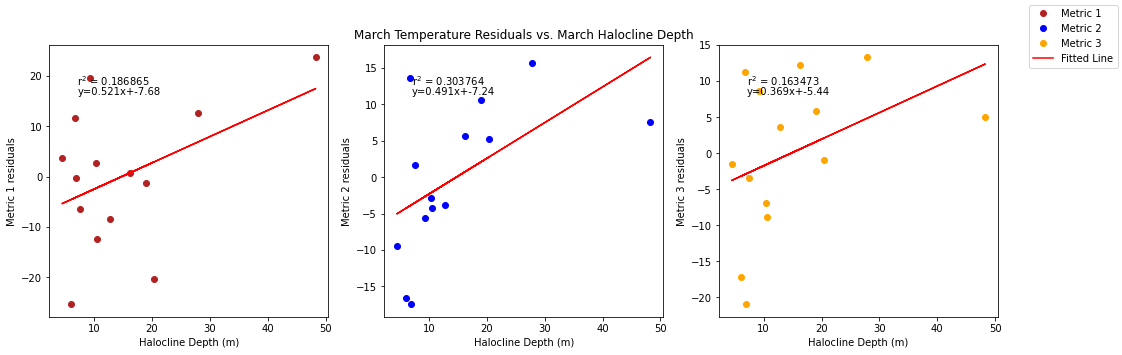

In [45]:
# ---------- Halocline ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(halomar,tempresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Halocline Depth (m)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,tempresid1)
ax4[0].plot(halomar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(halomar,tempresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Halocline Depth (m)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Temperature Residuals vs. March Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halomar,tempresid2)
ax4[1].plot(halomar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(halomar,tempresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Halocline Depth (m)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,tempresid3)
ax4[2].plot(halomar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

### Correlation plots of mid-depth NO3 residuals

In [46]:
#  residual calculations for each metric
midno3resid1=list()
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,yearday1)
for ind,y in enumerate(yearday1):
    x=midno3mar[ind]
    midno3resid1.append(y-(m*x+b))

midno3resid2=list()
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,yearday2)
for ind,y in enumerate(yearday2):
    x=midno3mar[ind]
    midno3resid2.append(y-(m*x+b))
    
midno3resid3=list()
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,yearday3)
for ind,y in enumerate(yearday3):
    x=midno3mar[ind]
    midno3resid3.append(y-(m*x+b))

In [47]:
dfmidno3=pd.DataFrame({'midno3':midno3mar,'midno3resid1':midno3resid1,'midno3resid2':midno3resid2,'midno3resid3':midno3resid3,'wind':windmar,'solar':solarmar,
                       'temp':tempmar,'sal':salmar,'fraser':frasermar,'deepno3':deepno3mar,'halocine':halomar})

<AxesSubplot:>

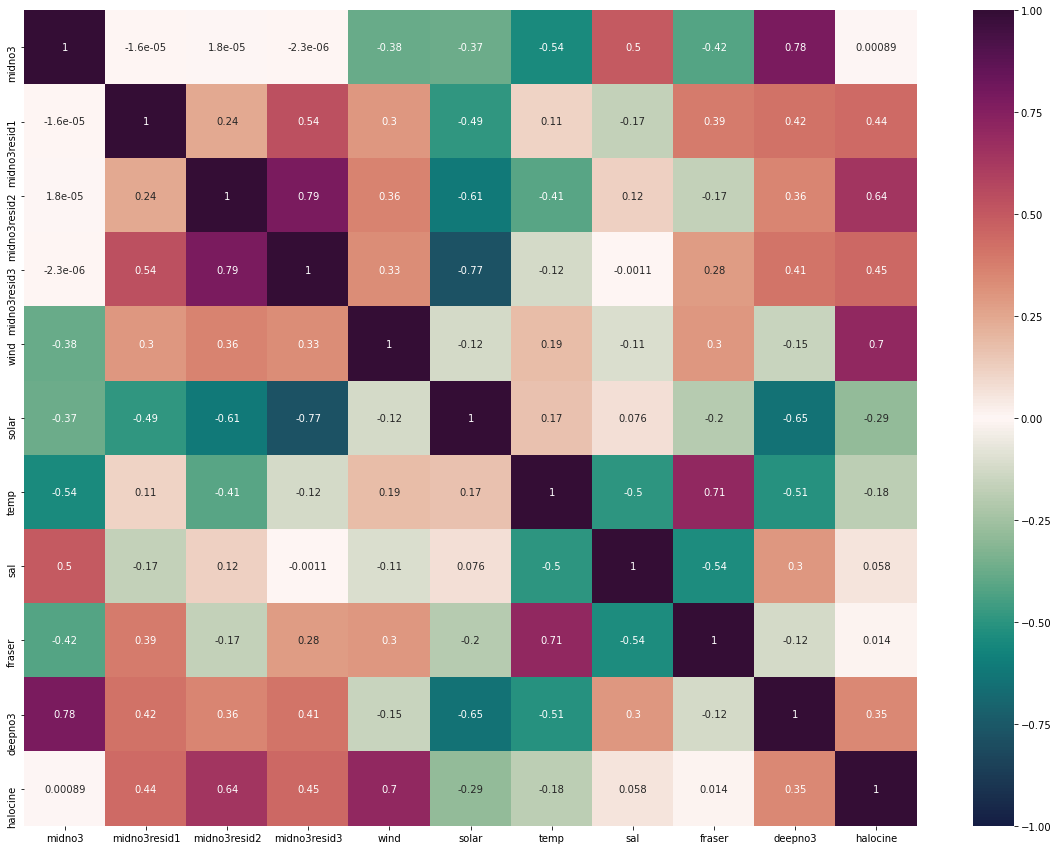

In [48]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfmidno3.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

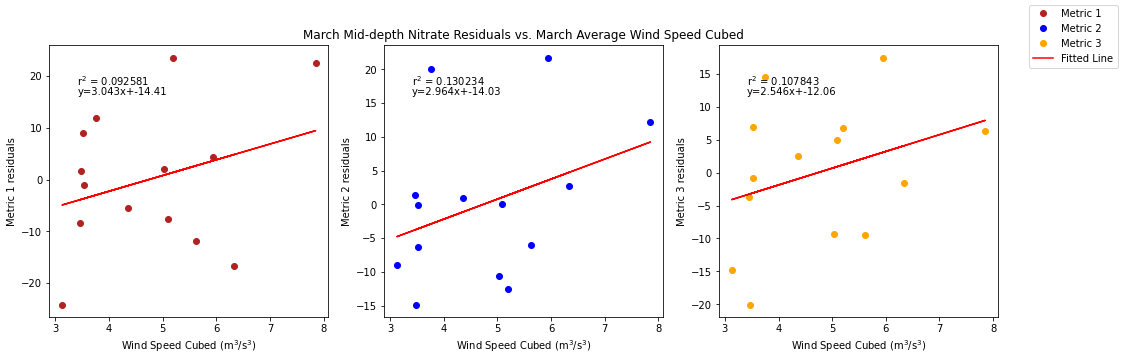

In [49]:
# ---------- wind ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,midno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,midno3resid1)
ax4[0].plot(windmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(windmar,midno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Mid-depth Nitrate Residuals vs. March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,midno3resid2)
ax4[1].plot(windmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(windmar,midno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(windmar,midno3resid3)
ax4[2].plot(windmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

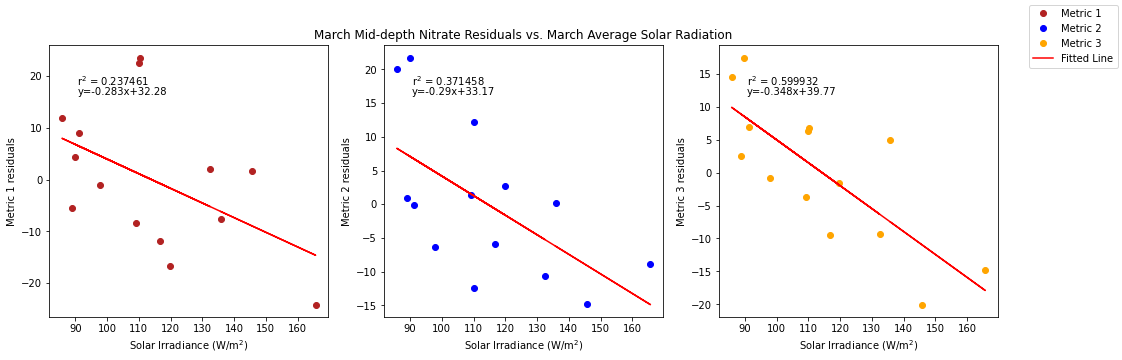

In [50]:
# ---------- Solar ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(solarmar,midno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,midno3resid1)
ax4[0].plot(solarmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(solarmar,midno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Mid-depth Nitrate Residuals vs. March Average Solar Radiation')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,midno3resid2)
ax4[1].plot(solarmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(solarmar,midno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,midno3resid3)
ax4[2].plot(solarmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

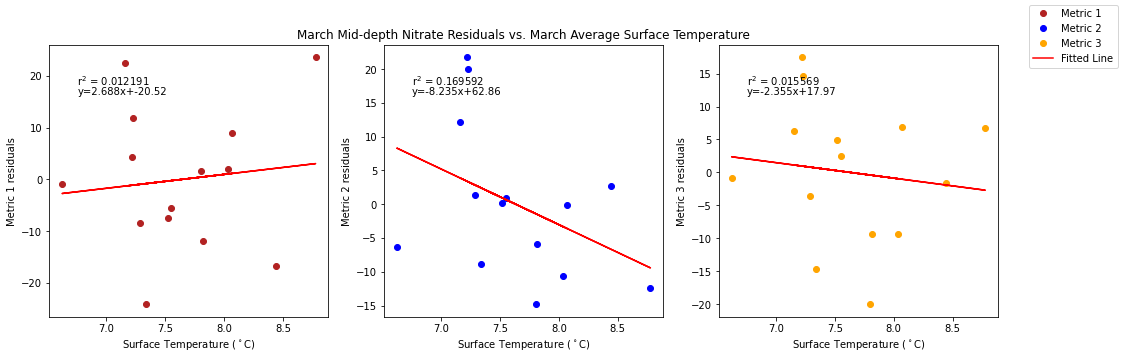

In [51]:
# ---------- Temperature ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(tempmar,midno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,midno3resid1)
ax4[0].plot(tempmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(tempmar,midno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Mid-depth Nitrate Residuals vs. March Average Surface Temperature')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,midno3resid2)
ax4[1].plot(tempmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(tempmar,midno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,midno3resid3)
ax4[2].plot(tempmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

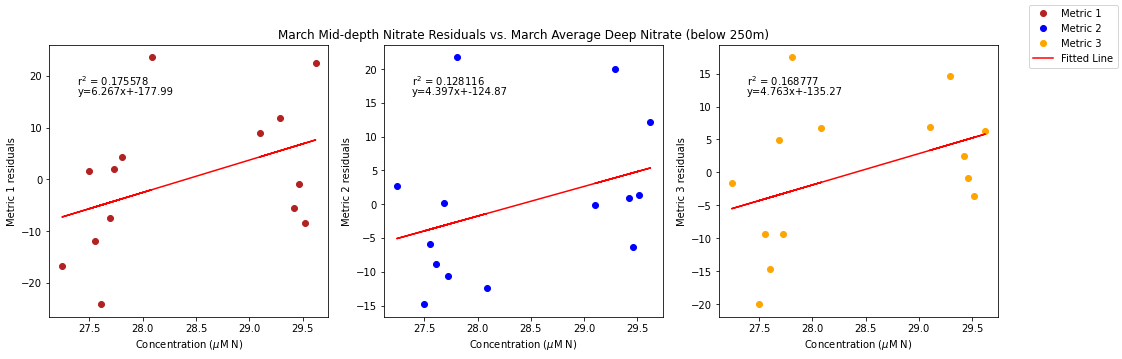

In [52]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(deepno3mar,midno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,midno3resid1)
ax4[0].plot(deepno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(deepno3mar,midno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Mid-depth Nitrate Residuals vs. March Average Deep Nitrate (below 250m)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,midno3resid2)
ax4[1].plot(deepno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(deepno3mar,midno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,midno3resid3)
ax4[2].plot(deepno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

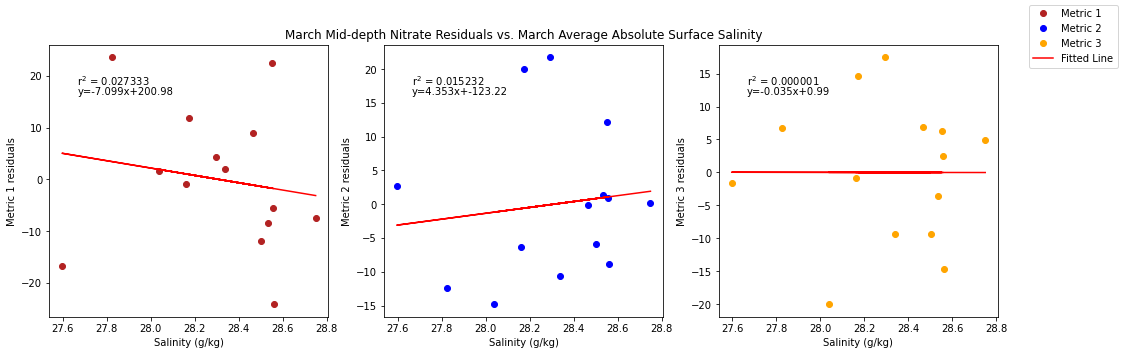

In [53]:
# ---------- Salinity ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,midno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,midno3resid1)
ax4[0].plot(salmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(salmar,midno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Mid-depth Nitrate Residuals vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,midno3resid2)
ax4[1].plot(salmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(salmar,midno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,midno3resid3)
ax4[2].plot(salmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

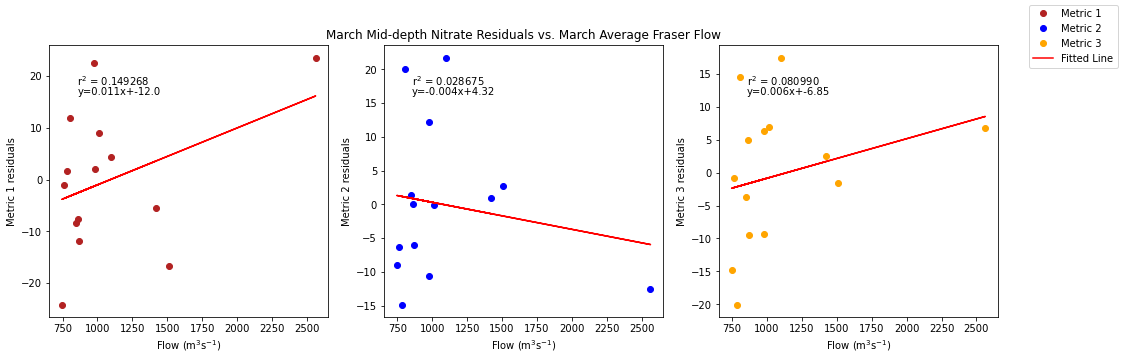

In [54]:
# ---------- Fraser ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(frasermar,midno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,midno3resid1)
ax4[0].plot(frasermar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(frasermar,midno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Mid-depth Nitrate Residuals vs. March Average Fraser Flow')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,midno3resid2)
ax4[1].plot(frasermar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(frasermar,midno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,midno3resid3)
ax4[2].plot(frasermar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

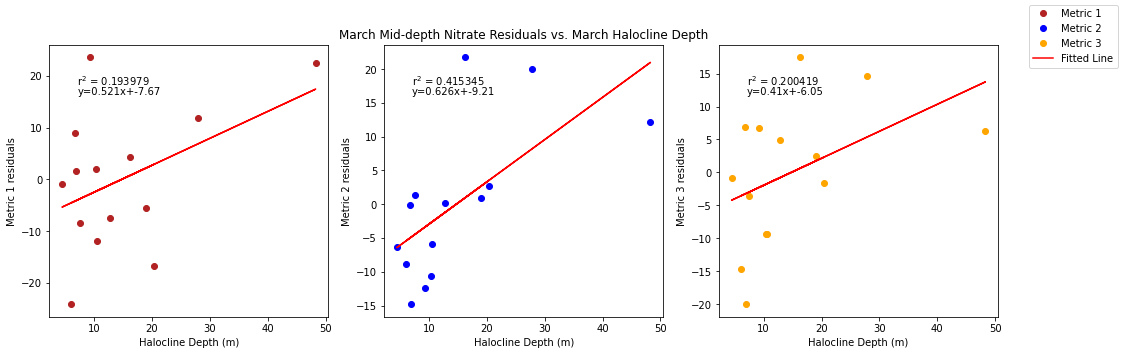

In [55]:
# ---------- Halocline ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(halomar,midno3resid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Halocline Depth (m)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,midno3resid1)
ax4[0].plot(halomar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(halomar,midno3resid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Halocline Depth (m)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Mid-depth Nitrate Residuals vs. March Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halomar,midno3resid2)
ax4[1].plot(halomar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(halomar,midno3resid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Halocline Depth (m)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,midno3resid3)
ax4[2].plot(halomar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

### Correlation plots of wind residuals

In [16]:
# Wind residual calculations for each metric
windresid1=list()
y,r2,m,b=bloomdrivers.reg_r2(windmar,yearday1)
for ind,y in enumerate(yearday1):
    x=windmar[ind]
    windresid1.append(y-(m*x+b))

windresid2=list()
y,r2,m,b=bloomdrivers.reg_r2(windmar,yearday2)
for ind,y in enumerate(yearday2):
    x=windmar[ind]
    windresid2.append(y-(m*x+b))
    
windresid3=list()
y,r2,m,b=bloomdrivers.reg_r2(windmar,yearday3)
for ind,y in enumerate(yearday3):
    x=windmar[ind]
    windresid3.append(y-(m*x+b))

In [17]:
dfwind=pd.DataFrame({'wind':windmar,'windresid1':windresid1,'windresid2':windresid2,'windresid3':windresid3,'solar':solarmar,
                  'temp':tempmar,'sal':salmar,'midno3':midno3mar,'fraser':frasermar,'deepno3':deepno3mar,'halocline':halomar})

<AxesSubplot:>

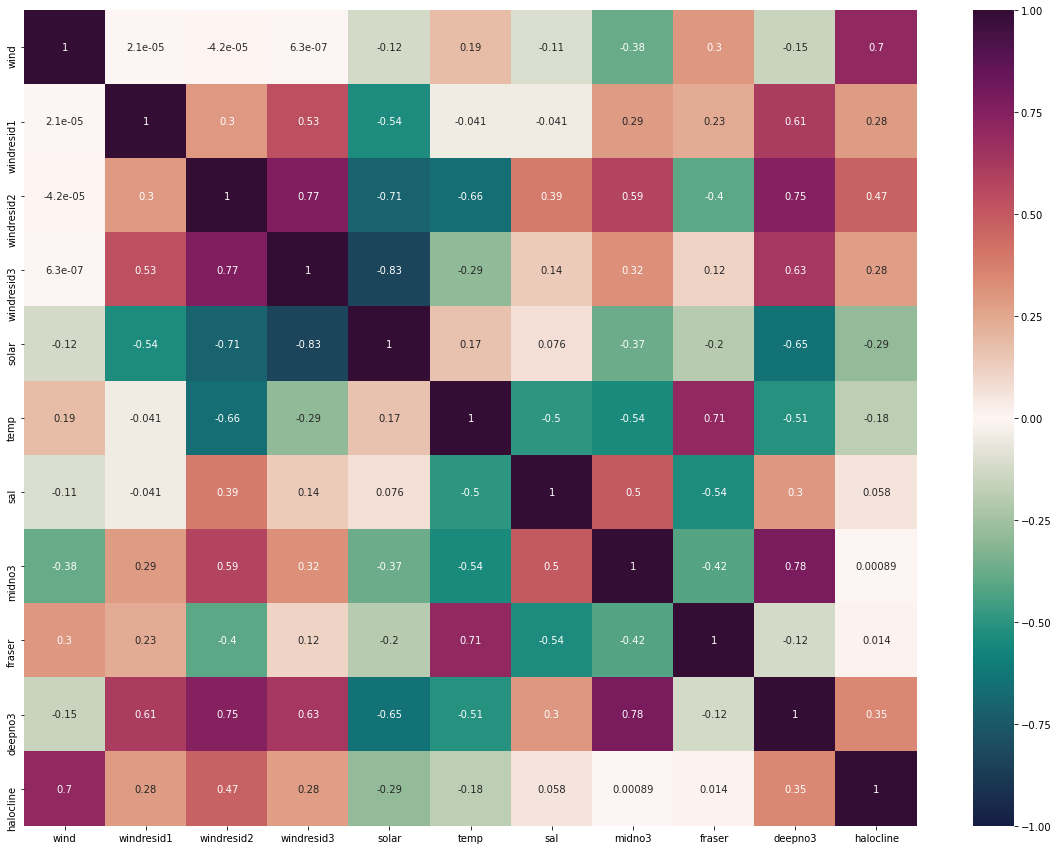

In [18]:
plt.subplots(figsize=(20,15))
cm1=cmocean.cm.curl
sns.heatmap(dfwind.corr(), annot = True,cmap=cm1,vmin=-1,vmax=1)

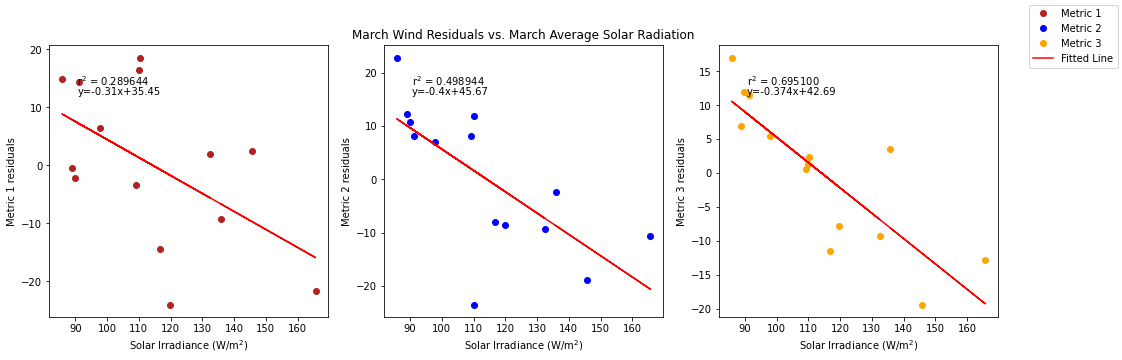

In [19]:
# ---------- Solar ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(solarmar,windresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,windresid1)
ax4[0].plot(solarmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(solarmar,windresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Wind Residuals vs. March Average Solar Radiation')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,windresid2)
ax4[1].plot(solarmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(solarmar,windresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,windresid3)
ax4[2].plot(solarmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

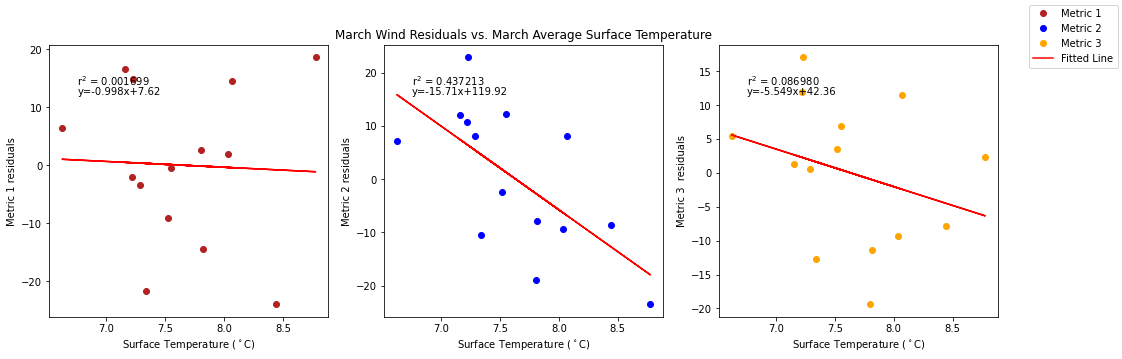

In [20]:
# ---------- Temperature ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(tempmar,windresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,windresid1)
ax4[0].plot(tempmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(tempmar,windresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Wind Residuals vs. March Average Surface Temperature')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,windresid2)
ax4[1].plot(tempmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(tempmar,windresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[2].set_ylabel('Metric 3  residuals')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,windresid3)
ax4[2].plot(tempmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

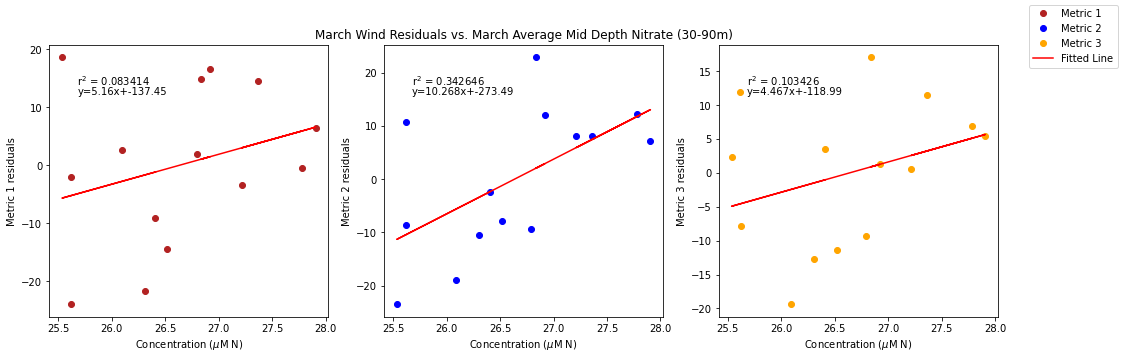

In [21]:
# ---------- Mid NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(midno3mar,windresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,windresid1)
ax4[0].plot(midno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(midno3mar,windresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Wind Residuals vs. March Average Mid Depth Nitrate (30-90m)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,windresid2)
ax4[1].plot(midno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(midno3mar,windresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,windresid3)
ax4[2].plot(midno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

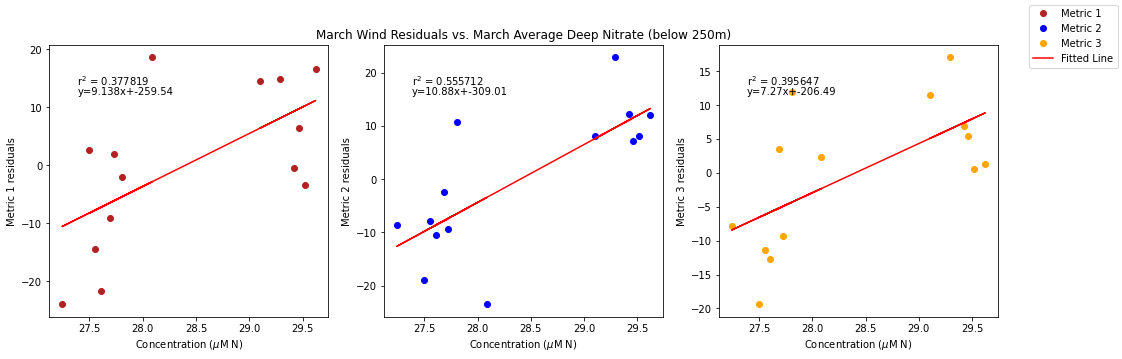

In [22]:
# ---------- Deep NO3 ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(deepno3mar,windresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,windresid1)
ax4[0].plot(deepno3mar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(deepno3mar,windresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Wind Residuals vs. March Average Deep Nitrate (below 250m)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,windresid2)
ax4[1].plot(deepno3mar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(deepno3mar,windresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(deepno3mar,windresid3)
ax4[2].plot(deepno3mar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

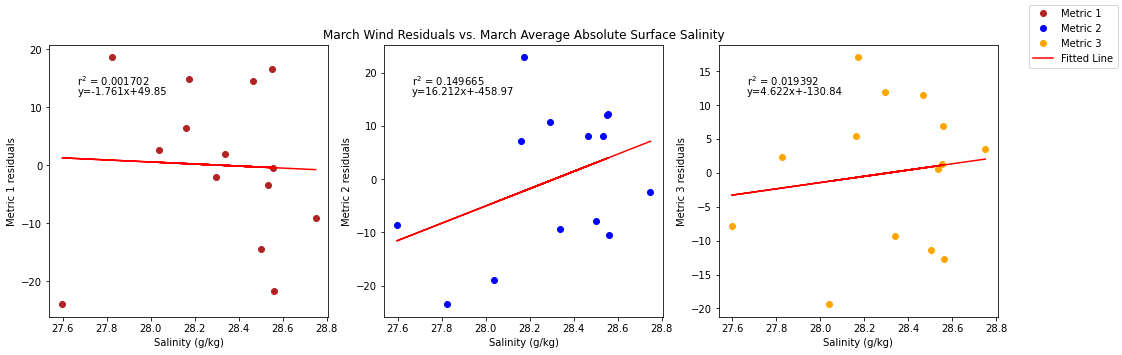

In [23]:
# ---------- Salinity ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,windresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,windresid1)
ax4[0].plot(salmar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(salmar,windresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Wind Residuals vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,windresid2)
ax4[1].plot(salmar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(salmar,windresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(salmar,windresid3)
ax4[2].plot(salmar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

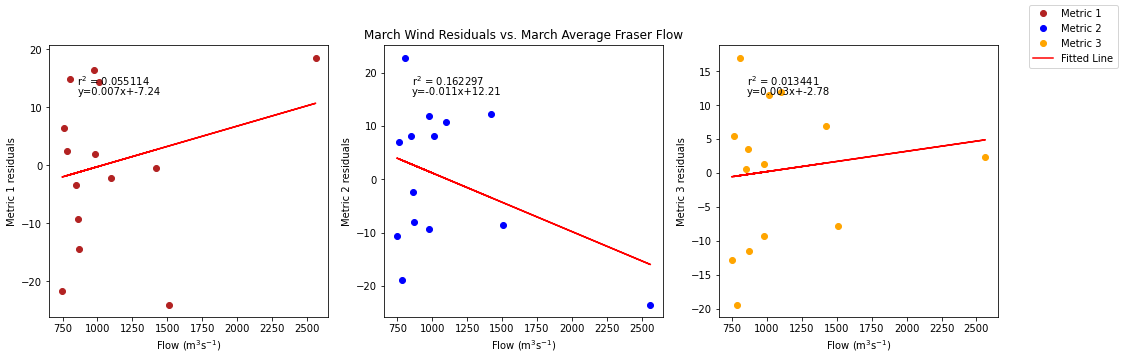

In [24]:
# ---------- Fraser ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(frasermar,windresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,windresid1)
ax4[0].plot(frasermar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(frasermar,windresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Wind Residuals vs. March Average Fraser Flow')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,windresid2)
ax4[1].plot(frasermar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(frasermar,windresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,windresid3)
ax4[2].plot(frasermar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

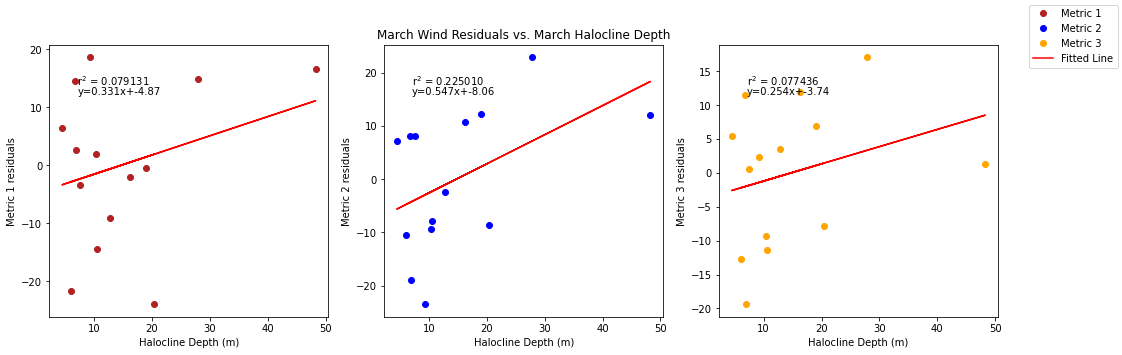

In [25]:
# ---------- Halocline ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(halomar,windresid1,'o',color='firebrick',label='Metric 1')
ax4[0].set_xlabel('Halocline Depth (m)')
ax4[0].set_ylabel('Metric 1 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,windresid1)
ax4[0].plot(halomar, y, 'r')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[0].transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[0].transAxes)

ax4[1].plot(halomar,windresid2,'o',color='b',label='Metric 2')
ax4[1].set_xlabel('Halocline Depth (m)')
ax4[1].set_ylabel('Metric 2 residuals')
ax4[1].set_title('March Wind Residuals vs. March Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halomar,windresid2)
ax4[1].plot(halomar, y, 'r')
ax4[1].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[1].transAxes)
ax4[1].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[1].transAxes)

ax4[2].plot(halomar,windresid3,'o',color='orange',label='Metric 3')
ax4[2].set_xlabel('Halocline Depth (m)')
ax4[2].set_ylabel('Metric 3 residuals')
y,r2,m,b=bloomdrivers.reg_r2(halomar,windresid3)
ax4[2].plot(halomar, y, 'r', label='Fitted Line')
ax4[2].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax4[2].transAxes)
ax4[2].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax4[2].transAxes)
fig4.legend()

### Multiple linear regression

**Correlation with winds (least to greatest)**
* Salinity, solar, deep no3, temp, fraser, midno3, halocline

**Correlation with solar**
* Salinity, wind, temp, fraser, halocline, midno3, deep no3

**Correlation with temperature**
* Solar, halocline wind, salinity, deep no3, midno3, fraser

**Correlation with midno3**
* Halocline, solar, wind, fraser, sal, temp, depp no3

**Correlation with deep no3**
* Fraser wind, sal, halocline, temp, solar, mid no3

**Correlation with salinity**
* Halocline, solar, wind, deepno3, temp/midno3, fraser

**Correlation with fraser**
* Halocline, deepno3, solar, wind, midno3, sal, temp

**Correlation with halocline**
* Midno3, fraser, sal, temp, solar, deepno3, wind


In [20]:
# make a table
variables=list()
rsquared=list()
adjusted_r2=list()

**MLR with january deepno3+salinity+temp, and bloom date:**

In [21]:
A=np.vstack((deepno3jan,saljan,tempjan,np.ones(np.shape(tempjan)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=3 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('deepno3jan,saljan,tempjan')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[   9.75563259   10.49966658   -7.88209314 -415.19733104]
r2 value:
[0.65180813]
adjusted r2 value:
[0.58850052]


**MLR with feb deepno3+salinity+solar and bloom date:**

In [22]:
A=np.vstack((deepno3feb,salfeb,solarfeb,np.ones(np.shape(salfeb)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=3 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('deepno3feb,salfeb,solarfeb')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[   9.33069212    1.86124695   -0.24535405 -199.36963347]
r2 value:
[0.54967335]
adjusted r2 value:
[0.46779578]


**MLR with feb midno3+solar+temp and bloom date:**

In [39]:
A=np.vstack((midno3feb,solarfeb,tempfeb,np.ones(np.shape(solarfeb)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=3 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('midno3feb,solarfeb,tempfeb')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -2.98681065  -0.97603155 -12.55783965 331.33244477]
r2 value:
[0.6342635]
adjusted r2 value:
[0.56776595]


**MLR with march solar+deepno3+halocline, and bloom date:**

In [23]:
A=np.vstack((solarmar,deepno3mar,halomar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=3 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,deepno3mar,halomar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.22002608   5.4790777    0.34732453 -35.52738868]
r2 value:
[0.71021129]
adjusted r2 value:
[0.65752243]


**MLR with solar+deepno3, and bloom date:**

In [24]:
A=np.vstack((solarmar,deepno3mar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=2 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,deepno3mar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.23892842   6.68378623 -62.4653773 ]
r2 value:
[0.63176615]
adjusted r2 value:
[0.60108]


**MLR with solar+halocline, and bloom date:**

In [25]:
A=np.vstack((solarmar,halomar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=2 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,halomar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.34668156   0.42269898 133.44362134]
r2 value:
[0.63278647]
adjusted r2 value:
[0.60218534]


**MLR with deepno3+halocline, and bloom date:**

In [26]:
A=np.vstack((deepno3mar,halomar,np.ones(np.shape(halomar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=2 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('deepno3mar,halomar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[   9.00163186    0.38021664 -161.19135546]
r2 value:
[0.62373828]
adjusted r2 value:
[0.59238313]


**MLR with feb midno3+march solar, and bloom date:**

In [27]:
A=np.vstack((midno3feb,solarmar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=2 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('midno3feb,solarmar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ 5.07335825 -0.32640808 -0.12420413]
r2 value:
[0.57754578]
adjusted r2 value:
[0.54234126]


**MLR with feb midno3+march solar+march temp, and bloom date:**

In [28]:
A=np.vstack((midno3feb,solarmar,tempmar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=3 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('midno3feb,solarmar,tempmar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[  0.59306092  -0.3474031  -12.45501673 218.75674844]
r2 value:
[0.7900923]
adjusted r2 value:
[0.75192726]


**MLR with feb midno3 and bloom date:**

In [30]:
A=np.vstack((midno3feb,np.ones(np.shape(midno3feb)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=1 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('midno3feb')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[   9.80665078 -165.6753908 ]
r2 value:
[0.32345092]
adjusted r2 value:
[0.32345092]


**MLR with march solar and bloom date:**

In [31]:
A=np.vstack((solarmar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=1 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.40642865 146.49757367]
r2 value:
[0.51077771]
adjusted r2 value:
[0.51077771]


**MLR with march temp and bloom date:**

In [32]:
A=np.vstack((tempmar,np.ones(np.shape(tempmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=1 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('tempmar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[-15.27717805 216.6865827 ]
r2 value:
[0.40959944]
adjusted r2 value:
[0.40959944]


**MLR with march solar+temp+densdiff30 and bloom date:**

In [34]:
A=np.vstack((densdiff30mar,solarmar,tempmar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=3 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,tempmar,densdiff30mar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[-20.58583808  -0.29989851 -11.08444723 235.13728731]
r2 value:
[0.90631533]
adjusted r2 value:
[0.88928175]


**MLR with march solar+temp and bloom date:**

In [35]:
A=np.vstack((solarmar,tempmar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=2 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,tempmar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.35546345 -12.77943888 238.22502757]
r2 value:
[0.78935945]
adjusted r2 value:
[0.77180608]


**MLR with march solar+halo and bloom date:**

In [41]:
A=np.vstack((solarmar,halomar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=2 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,halomar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.34668156   0.42269898 133.44362134]
r2 value:
[0.63278647]
adjusted r2 value:
[0.60218534]


**MLR with march solar+densdiff30 and bloom date:**

In [43]:
A=np.vstack((solarmar,densdiff30mar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=2 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,densdiff30mar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.32771236 -25.99998483 157.96370557]
r2 value:
[0.70516072]
adjusted r2 value:
[0.68059078]


**MLR with march solar+temp+halocline and bloom date:**

In [37]:
A=np.vstack((solarmar,tempmar,halomar,np.ones(np.shape(solarmar)))).T
b=yearday2
m=np.linalg.lstsq(A,b,rcond=None)[0]
model, resid = np.linalg.lstsq(A, b,rcond=None)[:2]
r2 = 1 - resid / (len(b) * np.var(b))
p=3 # number of parameters
ar2= 1-(len(b)-1)/(len(b)-p)*(1-r2)
print('Coefficients and intercept:')
print(m)
print('r2 value:')
print(r2)
print('adjusted r2 value:')
print(ar2)
variables.append('solarmar,tempmar,halomar')
rsquared.append(r2)
adjusted_r2.append(ar2)

Coefficients and intercept:
[ -0.31144302 -11.81502883   0.33864654 220.84453338]
r2 value:
[0.86608374]
adjusted r2 value:
[0.84173533]


In [44]:
mlr_df=pd.DataFrame({'variables':variables,'r-squared':rsquared,'adjusted r-squared':adjusted_r2})
mlr_df.sort_values(by=['adjusted r-squared'],ascending=False,inplace=True)
mlr_df

,variables,r-squared,adjusted r-squared
11,"solarmar,tempmar,densdiff30mar",[0.9063153278500765],[0.889281751095545]
13,"solarmar,tempmar,halomar",[0.8660837442574524],[0.8417353341224437]
12,"solarmar,tempmar",[0.78935945447974],[0.771806075686385]
7,"midno3feb,solarmar,tempmar",[0.7900923003497292],[0.7519272640496799]
16,"solarmar,densdiff30mar",[0.7051607193847842],[0.6805907793335162]
2,"solarmar,deepno3mar,halomar",[0.7102112879130422],[0.657522431169959]
4,"solarmar,halomar",[0.6327864680166315],[0.6021853403513509]
15,"solarmar,halomar",[0.6327864680166315],[0.6021853403513509]
3,"solarmar,deepno3mar",[0.6317661500743295],[0.6010799959138569]
5,"deepno3mar,halomar",[0.6237382755092498],[0.5923831318016872]
